In [73]:
import qcfractal.interface as ptl
client = ptl.FractalClient(address="localhost:7777", verify=False)

In [305]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

In [75]:
%run /home/fastdata/Shared/Masters_Project/My_Classes.ipynb

In [76]:
import nbimporter
import Project_workbook_3

In [77]:
import inspect

methods_and_docstrings = {
    name: obj.__doc__ for name, obj in inspect.getmembers(ds_be) 
    if callable(obj) and not name.startswith("__")
}

for method, doc in methods_and_docstrings.items():
    print(f"Method: {method}")
    print(f"Description: {doc}")
    print("-" * 40)

NameError: name 'ds_be' is not defined

## $\nu_{TST}$ calculation

 - We need:
     - $I_{x},I_{y}, I_{z}$: principle moments of inertia 
         - We need to use the bond analge snad lengths of the geometrically optimised structures and diagonalise the matrix tensor
     - Symmetry factor $\sigma$
         - Can be found intuitively
     - $T_{peak}$: Monolayer Peak Desorption Temperature
         - ...
         
- We need to do this for:
    - CO
    - $CH_{3}OH$
    - $H_{2}CO$
    - $H_{2}$
    - $NH_{3}$
    - OH
    - $CH_{4}$
    - $CH_{2}OH$
    - $CH_{3}O$
    - $CH_{3}$
    - $H_{2}S$
    - HCl
    - HCOOH
    - HCO
    - HF
    - HNC
    - $NH_{2}$
    - $NHCH_{2}$
    - $C_{2}H_{2}$
    - $H_{2}O$
    - $N_{2}$
    - $HCN$


    

In [11]:
ds_mols  = client.get_collection("OptimizationDataset", "project_molecules")
ds_mols.status(collapse = False)

,blyp-d3bj_def2-svpd,b3lyp-d3bj_def2-svpd,hf-3c-d3bj_MINIX,b3lyp_def2-svpd,hf-3c_MINIX,hf-d3bj_sto-3g,hf_sto-3g,hf_MINIX,mpwb1k-d3bj_def2-tzvp,mpwb1k-d3bj_def2-svpd
C2H2,None,COMPLETE,None,None,None,None,None,None,COMPLETE,COMPLETE
CO2_CO,None,COMPLETE,None,None,None,None,None,None,COMPLETE,COMPLETE
H2O_H2O,None,COMPLETE,None,None,None,None,None,None,COMPLETE,COMPLETE
H2O,None,COMPLETE,None,None,None,None,None,None,COMPLETE,COMPLETE
CO2_CO2,None,COMPLETE,None,None,None,None,None,None,COMPLETE,COMPLETE
CH4,None,COMPLETE,None,None,None,None,None,None,COMPLETE,COMPLETE
CO,None,COMPLETE,None,None,None,None,None,None,COMPLETE,COMPLETE
CH3OH,None,INCOMPLETE,None,None,None,None,None,None,COMPLETE,COMPLETE
CO2,None,COMPLETE,None,None,None,None,None,None,COMPLETE,COMPLETE
H2CO,None,COMPLETE,None,None,None,None,None,None,COMPLETE,COMPLETE


## Obtaining the Moments of Inertia and Symmetry Factors

In [165]:
import numpy as np


# molecules=['OH', 'HCO', 'CH3O','CH2OH','CH3',
#            #'NH2',
#            'NHCH2','CH4','CO','CH3OH','H2CO'
#            'H2S','H2','HCl','HCN','HCOOH','HCO','HF','HNC','N2','NH3',
#           ]

def get_xyz_positions(molecule):
    #if molecule not in ['OH', 'HCO', 'CH3O','CH2OH','CH3','NH2','NHCH2']:
    ds_mols  = client.get_collection("OptimizationDataset", "project_molecules")
    r=ds_mols.get_record(molecule,'mpwb1k-d3bj_def2-tzvp')
        
#     else:
#         ds_mols  = client.get_collection("OptimizationDataset", "radicals")
#         r=ds_mols.get_record(molecule,'ublyp-d3bj_def2-svpd')
        
        

    a=(r.get_final_molecule().pretty_print()).split('\n')
    data = [s.split() for s in a 
         if  s.strip() and not s.startswith(('Geometry', 'Center', '-'))][3:]
    cleaned_data=[[d[0]]+ list(map(float,d[1:]))for d in data]
        
    return cleaned_data
    

def calculate_moments_of_inertia(atoms, coordinates):
    """
    Calculate the principal moments of inertia for a molecule.

    Parameters:
    atoms : list of tuples
        A list of tuples where each tuple contains the atomic symbol and mass of an atom.
    coordinates : numpy array
        A 2D numpy array where each row represents the (x, y, z) coordinates of an atom.

    Returns:
    numpy array
        The principal moments of inertia.
    """
    # Calculate the center of mass
    total_mass = sum(mass for _, mass in atoms)
    coordinates = np.array([coordinates[i][1:] for i in range(len(coordinates))])
    center_of_mass = sum(mass * coordinates[i] for i, (_, mass) in enumerate(atoms)) / total_mass

    # Translate coordinates to the center of mass
    translated_coords = coordinates - center_of_mass

    # Initialize the inertia tensor
    inertia_tensor = np.zeros((3, 3))

    # Calculate the inertia tensor
    for i, (_, mass) in enumerate(atoms):
        x, y, z = translated_coords[i]
        inertia_tensor[0, 0] += mass * (y**2 + z**2)
        inertia_tensor[1, 1] += mass * (x**2 + z**2)
        inertia_tensor[2, 2] += mass * (x**2 + y**2)
        inertia_tensor[0, 1] -= mass * x * y
        inertia_tensor[0, 2] -= mass * x * z
        inertia_tensor[1, 2] -= mass * y * z

    # Symmetrize the inertia tensor
    inertia_tensor[1, 0] = inertia_tensor[0, 1]
    inertia_tensor[2, 0] = inertia_tensor[0, 2]
    inertia_tensor[2, 1] = inertia_tensor[1, 2]

    # Calculate the principal moments of inertia
    principal_moments = np.linalg.eigvalsh(inertia_tensor)

    return principal_moments,total_mass

# Example usage
# Define atoms as (symbol, mass) and coordinates as (x, y, z)
# atoms = [('C', 1.008), ('O', 16.00), ('H', 1.008)]
# coordinates = np.array([
#     [0.0, 0.0, 0.0],  # Oxygen
#     [0.9572, 0.0, 0.0],  # Hydrogen 1
#     [-0.2399872, 0.927297, 0.0]  # Hydrogen 2
# ])


molecules = {
    "CO": [("C", 12.011), ("O", 15.999)],
    "CH3OH": [("C", 12.011), ("H", 1.008), ("H", 1.008), ("H", 1.008), ("O", 15.999), ("H", 1.008)],
    "H2CO": [("H", 1.008), ("H", 1.008), ("C", 12.011), ("O", 15.999)],
    "H2": [("H", 1.008), ("H", 1.008)],
    "NH3": [("N", 14.007), ("H", 1.008), ("H", 1.008), ("H", 1.008)],
    "OH": [("O", 15.999), ("H", 1.008)],
    "CH4": [("C", 12.011), ("H", 1.008), ("H", 1.008), ("H", 1.008), ("H", 1.008)],
    "CH2OH": [("C", 12.011), ("H", 1.008), ("H", 1.008), ("O", 15.999), ("H", 1.008)],
    "CH3O": [("C", 12.011), ("H", 1.008), ("H", 1.008), ("H", 1.008), ("O", 15.999)],
    "CH3": [("C", 12.011), ("H", 1.008), ("H", 1.008), ("H", 1.008)],
    "H2S": [("H", 1.008), ("H", 1.008), ("S", 32.06)],
    "HCl": [("H", 1.008), ("Cl", 35.45)],
    "HCOOH": [("H", 1.008), ("C", 12.011), ("O", 15.999), ("O", 15.999), ("H", 1.008)],
    "HCO": [("H", 1.008), ("C", 12.011), ("O", 15.999)],
    "HF": [("H", 1.008), ("F", 18.998)],
    "HNC": [("H", 1.008), ("N", 14.007), ("C", 12.011)],
    "NH2": [("N", 14.007), ("H", 1.008), ("H", 1.008)],
   #"NHCH2": [("N", 14.007), ("H", 1.008), ("C", 12.011), ("H", 1.008), ("H", 1.008)],
    "C2H2": [("C", 12.011), ("C", 12.011), ("H", 1.008), ("H", 1.008)],
    "H2O": [("H", 1.008), ("H", 1.008), ("O", 15.999)],
    "N2": [("N", 14.007), ("N", 14.007)],
    "HCN": [("H", 1.008), ("C", 12.011), ("N", 14.007)],
    "CO2":[("C",12.011),("O",15.999),("O",15.999)]
}





list_of_moments_of_inertia=[]
for molecule,atom in molecules.items():
    atoms = atom
    coordinates = get_xyz_positions(molecule)
    moments_of_inertia = calculate_moments_of_inertia(atoms, coordinates)[0]
    mass =calculate_moments_of_inertia(atoms, coordinates)[1]                                          
    d= {'molecule':molecule,'Ix':moments_of_inertia[0],'Iy':moments_of_inertia[1],
        'Iz':moments_of_inertia[2],'mass (amu)': mass}
    list_of_moments_of_inertia=np.append(list_of_moments_of_inertia,d)
    
list_of_moments_of_inertia
    #print(f"Principal moments of inertia (amu·Å²): for {molecule} ", moments_of_inertia)

array([{'molecule': 'CO', 'Ix': 1.1102230246251565e-16, 'Iy': 8.51611254718944, 'Iz': 8.51611254718944, 'mass (amu)': 28.009999999999998},
       {'molecule': 'CH3OH', 'Ix': 3.868063945955981, 'Iy': 19.86910313245124, 'Iz': 20.58201263904359, 'mass (amu)': 32.042},
       {'molecule': 'H2CO', 'Ix': 2.8785033427780027, 'Iy': 27.5208082565911, 'Iz': 30.3993115993691, 'mass (amu)': 30.026},
       {'molecule': 'H2', 'Ix': -2.168404344971009e-19, 'Iy': 0.2755535961151959, 'Iz': 0.275553596115196, 'mass (amu)': 2.016},
       {'molecule': 'NH3', 'Ix': 1.6562979292918527, 'Iy': 1.6563034882218666, 'Iz': 2.647630510062533, 'mass (amu)': 17.031},
       {'molecule': 'OH', 'Ix': 2.1453653523269864e-33, 'Iy': 0.8831604560405357, 'Iz': 0.8831604560405357, 'mass (amu)': 17.007},
       {'molecule': 'CH4', 'Ix': 3.147939870017881, 'Iy': 3.1479460913673694, 'Iz': 3.147955175516644, 'mass (amu)': 16.042999999999996},
       {'molecule': 'CH2OH', 'Ix': 2.5310521089347047, 'Iy': 16.44444704820559, 'Iz'

In [167]:
labels =[
"$CO$",
"$CH_{3}OH$",
"$H_{2}CO$",
"$H_{2}$",
"$NH_{3}$", 
"$OH$", 
"$CH_{4}$" ,
"$CH_{2}OH$",
"$CH_{3}O$",
"$CH_{3}$" ,
"$H_{2}S$" ,
"$HCl$" ,
"$HCOOH$",
"$HCO$",
"$HF$",
"$HNC$", 
"$NH_{2}$", 
#"$NHCH_{2}$",
"$C_{2}H_{2}$",
"$H_{2}O$", 
"$N_{2}$",
"$HCN$",
"$CO_{2}$"]

df_I_values = pd.DataFrame(data=np.array([[list_of_moments_of_inertia[i]['Ix'] 
                                                               for i in range(len(list_of_moments_of_inertia))],
                                     [list_of_moments_of_inertia[i]['Iy'] 
                                                               for i in range(len(list_of_moments_of_inertia))],
                                      [list_of_moments_of_inertia[i]['Iz'] 
                                                               for i in range(len(list_of_moments_of_inertia))],
                                         [list_of_moments_of_inertia[i]['mass (amu)']
                                                               for i in range(len(list_of_moments_of_inertia))]])
                           .transpose()
                         ,columns=['$I_{x}$','$I_{y}$','$I_{z}$','mass (amu)']
                         ,index=[label for label in labels]
                                          )



symmetry_factors = {
    "CO": 1,      
    "CH3OH": 1,   
    "H2CO": 1,    
    "H2": 2,   
    "NH3": 3,  
    "OH": 1,   
    "CH4": 12, 
    "CH2OH": 1,
    "CH3O": 1, 
    "CH3": 3,  
    "H2S": 2,  
    "HCl": 1,  
    "HCOOH": 1,
    "HCO": 1,  
    "HF": 1,   
    "HNC": 1,  
    "NH2": 2,  
    #"NHCH2": 1,
    "C2H2": 2, 
    "H2O": 2,  
    "N2": 2,   
    "HCN": 1,
    "CO2":2} 

df_I_values['$\sigma$']= [value for key,value in symmetry_factors.items()]
#df_I_values['$I_{x}$']=np.where(df_I_values['$I_{x}$']<=10e-10, 0,df_I_values['$I_{x}$'])
df_I_values["2D-rotations?"] = ['yes' if i<=10e-10 else 'no' for i in df_I_values['$I_{x}$']]
df_I_values


,$I_{x}$,$I_{y}$,$I_{z}$,mass (amu),$\sigma$,2D-rotations?
$CO$,1.110223e-16,8.516113,8.516113,28.010,1,yes
$CH_{3}OH$,3.868064e+00,19.869103,20.582013,32.042,1,no
$H_{2}CO$,2.878503e+00,27.520808,30.399312,30.026,1,no
$H_{2}$,-2.168404e-19,0.275554,0.275554,2.016,2,yes
$NH_{3}$,1.656298e+00,1.656303,2.647631,17.031,3,no
$OH$,2.145365e-33,0.883160,0.883160,17.007,1,yes
$CH_{4}$,3.147940e+00,3.147946,3.147955,16.043,12,no
$CH_{2}OH$,2.531052e+00,16.444447,18.975499,31.034,1,no
$CH_{3}O$,2.423271e+00,78.538223,80.961494,31.034,1,no
$CH_{3}$,1.740130e+00,1.740138,3.480268,15.035,3,no


- Solving the ODE:
    - $\frac{dN}{dT} = \frac{-k_{des}(T)}{\beta}$
    - where $k_{des} =\nu(\sigma)\sigma^{n=1} e^{\frac{E_B(\sigma)}{RT}} $
    - $T =T_{0} + \beta t$ 
    

## Dataframe of the Literature Values on ASW Surface

In [200]:
#Create a df of the reference,molecule in question,heating rate(Ks^1), 
#pre-exponent factor(s^-1),inital coverage(ML),initial temperature(K),
#binding energy(K),peak temperature(K)

list_of_lit_values=[{'ref':'Luna et al., 2008',
                     'molecule':'$CH_{4}$',
                     'heating rate (Ks^-1)':1/60,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':0.05,
                     'Initial temp (K)':30,
                     'Binding Energy (K)':800,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$CO_{2}$$'},
                    
                    {'ref':'Simon et al. 2019',
                     'molecule':'$CO$',
                     'heating rate (Ks^-1)':1/60,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':0.1,
                     'Initial temp (K)':20,
                     'Binding Energy (K)':np.nan,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$CO_{2}$$'
                     
                        
                    },
                    
                    {
                      'ref':'Noble et al. 2012',
                     'molecule':'$CO_{2}$',
                     'heating rate (Ks^-1)':10/60,
                     'pre exponent factor (s^-1)':float(9.5e11),
                     'Initial coverage':1,
                     'Initial temp (K)':18,
                     'Binding Energy (K)':2361,
                     'Peak Temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$'                           
                        
                    },
                    {'ref':'Simon et al. 2019',
                     'molecule':'$CO$',
                     'heating rate (Ks^-1)':1/60,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':0.25,
                     'Initial temp (K)':20,
                     'Binding Energy (K)':np.nan,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$CO_{2}$$'
                        
                    },
                    {'ref':'Simon et al. 2019',
                     'molecule':'$CO$',
                     'heating rate (Ks^-1)':1/60,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':0.5,
                     'Initial temp (K)':20,
                     'Binding Energy (K)':np.nan,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$CO_{2}$$'  
                    },
                    {
                        'ref':'Luna et al. 2018',
                     'molecule':'$CH_{3}OH$',
                     'heating rate (Ks^-1)':4/60,
                     'pre exponent factor (s^-1)':float(5e14),
                     'Initial coverage':1/21,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':5590,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$'
                     
                        
                    },
                    
                    {#**
                        'ref':'Noble et al. 2012',
                     'molecule':'$H_{2}CO$',
                     'heating rate (Ks^-1)':0.04,
                     'pre exponent factor (s^-1)':float(1e13),
                     'Initial coverage':1,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':round((25*1000)/8.314,0),
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$'    
                    },
                    
                    { 'ref':'Pirronello et al. 1997, Amiaud et al. 2007',
                     'molecule':'$H_{2}$',
                     'heating rate (Ks^-1)':10/60,
                     'pre exponent factor (s^-1)':float(1e13),
                     'Initial coverage':0.55,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':450,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$'    
                         
                    },
                    
                    { 'ref':'Minissale et al. 2022, Wakelam et al. 2017',
                     'molecule':'$NH_{3}$',
                     'heating rate (Ks^-1)':1/60,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':1,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':5334,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$'    
                         
                    },
                    
                    {
                       'ref':'Sameera et al. 2017',
                     'molecule':'$OH$',
                     'heating rate (Ks^-1)':1/60,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':1,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':5106,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$' 
                    }
                         
                    ,
                    {
                      'ref':' Wakelam et al. 2017',
                     'molecule':'$CH_{2}OH$',
                     'heating rate (Ks^-1)':1/60,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':1,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':4400,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$'   
                        
                    },
                    {
                      'ref':' Wakelam et al. 2017',
                     'molecule':'$CH_{3}O$',
                     'heating rate (Ks^-1)':1/60,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':1,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':4400,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$'  
                        
                    },
                    {'ref':' Wakelam et al. 2017',
                     'molecule':'$CH_{3}$',
                     'heating rate (Ks^-1)':1/60,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':1,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':960,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$' 
                                       
                    },
                    {
                       'ref':'Wakelam et al. 2017, Oba et al. 2018',
                     'molecule':'$H_{2}S$',
                     'heating rate (Ks^-1)':4/60,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':0.07,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':2700,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$' 
                                        
                        
                    },
                    {
                     'ref':'Wakelam et al. 2017, Olanrewaju et al. 2011',
                     'molecule':'$HCl$',
                     'heating rate (Ks^-1)':4/60,
                     'pre exponent factor (s^-1)':float(1e13),
                     'Initial coverage':0.5/40,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':5172,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$'    
                    },
                    {
                     'ref': 'Ferrero et al. 2020, Das et al. 2018, Chaabouni et al. 2020',
                     'molecule':'$HCOOH$',
                     'heating rate (Ks^-1)':0.2,
                     'pre exponent factor (s^-1)':float(1e13),
                     'Initial coverage':0.3,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':(7991+3483+5000+5570)/4,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$'
                        
                    },
                    {
                      'ref': 'Minissale et al. 2016',
                     'molecule':'$HCO$',
                     'heating rate (Ks^-1)':1/60,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':1,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':1600,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$'         
                    },
                    {
                         'ref': 'Wakelam et al. 2017, Bovolenta et al. 2022',
                     'molecule':'$HF$',
                     'heating rate (Ks^-1)':1/60,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':1,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':(7500+4794)/2,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$'
                        
                    },
                    {
                       'ref': 'Wakelam et al. 2017',
                     'molecule':'$HNC$',
                     'heating rate (Ks^-1)':1/60,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':1,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':3800,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$' 
                        
                        
                    },
                    
                    {
                        
                        'ref': 'Bovolenta et al. 2022',
                     'molecule':'$NHCH_{2}$',
                     'heating rate (Ks^-1)':1/60,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':1,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':3536,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$' 
                      
                    },
                    
                    {
                       'ref': 'Behmard et al. 2019',
                     'molecule':'$C_{2}H_{2}$',
                     'heating rate (Ks^-1)':2/60,
                     'pre exponent factor (s^-1)':float(3e16),
                     'Initial coverage':0.2,
                     'Initial temp (K)':11,
                     'Binding Energy (K)':3000,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$' 
                        
                    },
                    {
                       'ref': 'Fraser et al. 2001',
                     'molecule':'$H_{2}O$',
                     'heating rate (Ks^-1)':0.01,
                     'pre exponent factor (s^-1)':float(1e13),
                     'Initial coverage':1,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':5773,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$' 
                        
                    },
                    
                    {
                        'ref': 'Smith et al. 2016',
                     'molecule':'$N_{2}$',
                     'heating rate (Ks^-1)':1,
                     'pre exponent factor (s^-1)':float(4.1e15),
                     'Initial coverage':1,
                     'Initial temp (K)':25,
                     'Binding Energy (K)':1155,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$'
                        
                    },
                    
                    {
                     'ref': 'Wakelam et al. 2017',
                     'molecule':'$HCN$',
                     'heating rate (Ks^-1)':1,
                     'pre exponent factor (s^-1)':float(1e12),
                     'Initial coverage':1,
                     'Initial temp (K)':10,
                     'Binding Energy (K)':3700,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$'
                        
                        
                        
                    },
                    {
                       'ref': 'Smith et al. 2016',
                     'molecule':'$CH_{4}$',
                     'heating rate (Ks^-1)':1,
                     'pre exponent factor (s^-1)':float(9.8e14),
                     'Initial coverage':1,
                     'Initial temp (K)':25,
                     'Binding Energy (K)':1371.1,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$' 
                        
                    },
                    
                    {
                      'ref': 'Noble et al. 2011',
                     'molecule':'$CO$',
                     'heating rate (Ks^-1)':10/60,
                     'pre exponent factor (s^-1)':float(7.1e11),
                     'Initial coverage':1,
                     'Initial temp (K)':18,
                     'Binding Energy (K)':1009,
                     'Peak temp (K)':np.nan,
                     'Surface':'$$H_{2}O$$'   
                        
                    }
                    
                    
                    
                    
                    
                    
                    
      
      
      ]
TPD_lit_df=pd.DataFrame(data=list_of_lit_values)

TPD_lit_df

,ref,molecule,heating rate (Ks^-1),pre exponent factor (s^-1),Initial coverage,Initial temp (K),Binding Energy (K),Peak temp (K),Surface,Peak Temp (K)
0,"Luna et al., 2008",$CH_{4}$,0.016667,1.000000e+12,0.050000,30,800.0,NaN,$$CO_{2}$$,NaN
1,Simon et al. 2019,$CO$,0.016667,1.000000e+12,0.100000,20,NaN,NaN,$$CO_{2}$$,NaN
2,Noble et al. 2012,$CO_{2}$,0.166667,9.500000e+11,1.000000,18,2361.0,NaN,$$H_{2}O$$,NaN
3,Simon et al. 2019,$CO$,0.016667,1.000000e+12,0.250000,20,NaN,NaN,$$CO_{2}$$,NaN
4,Simon et al. 2019,$CO$,0.016667,1.000000e+12,0.500000,20,NaN,NaN,$$CO_{2}$$,NaN
5,Luna et al. 2018,$CH_{3}OH$,0.066667,5.000000e+14,0.047619,10,5590.0,NaN,$$H_{2}O$$,NaN
6,Noble et al. 2012,$H_{2}CO$,0.040000,1.000000e+13,1.000000,10,3007.0,NaN,$$H_{2}O$$,NaN
7,"Pirronello et al. 1997, Amiaud et al. 2007",$H_{2}$,0.166667,1.000000e+13,0.550000,10,450.0,NaN,$$H_{2}O$$,NaN
8,"Minissale et al. 2022, Wakelam et al. 2017",$NH_{3}$,0.016667,1.000000e+12,1.000000,10,5334.0,NaN,$$H_{2}O$$,NaN
9,Sameera et al. 2017,$OH$,0.016667,1.000000e+12,1.000000,10,5106.0,NaN,$$H_{2}O$$,NaN


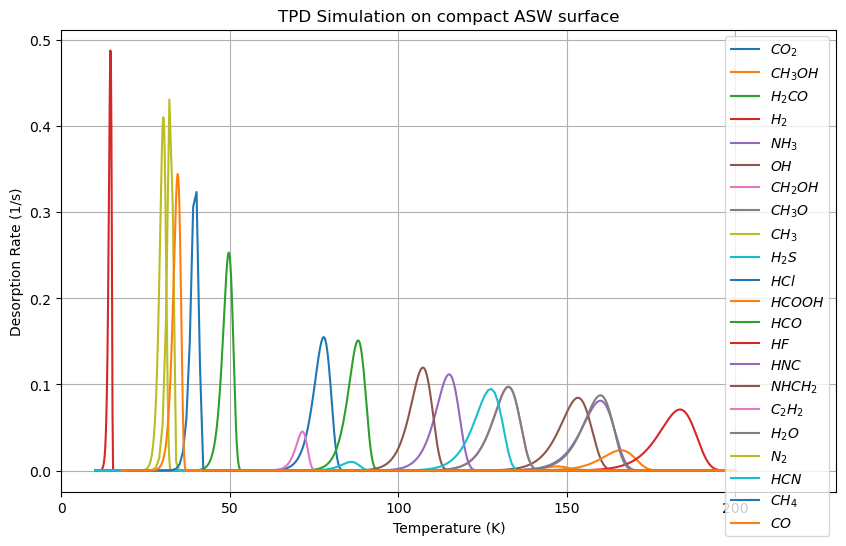

In [197]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Functions
# def temperature(t, T0, beta):
#     """ Calculate temperature at time t. """
#     return T0 + beta * t

def rate_constant(T, k0, E, R):
    """ Calculate the rate constant at temperature T. """
    return k0 * np.exp(-E / (R * T))

def integrand(T,theta, k0, E, R, beta):
    """ Calculate the rate of change of coverage at time t. """
#     T = temperature(t, T0, beta)
    k = rate_constant(T, k0, E, R)
    return -(k * theta)/beta

# Parameters for the TPD simulation
R = 8.314  # Universal gas constant in J/(mol*K)
max_temp=[]
for index, row in TPD_lit_df.iterrows():
    if row['Surface'] != r'$$CO_{2}$$':
    
        k0 = row['pre exponent factor (s^-1)']  # Pre-exponential factor in 1/s
        E_k =  row['Binding Energy (K)'] # Activation energy in K
        E = 8.3*E_k  # Activation energy in J/mol
        T0 = row['Initial temp (K)'] # Initial temperature in K
        beta = row['heating rate (Ks^-1)'] # Heating rate in K/s
        theta0 = row['Initial coverage']  # Initial coverage
        #time array
#         if row['molecule']!='HF':
        time = np.linspace(0, 10000, 10000)  # Time from 0 to ... seconds
#         else:
#             time = np.linspace(0, 13000, 10000)
        #temp array
        #temperatures= temperature(time, T0, beta)
        T_end=200
        temperatures = np.linspace(T0,T_end,int((T_end-T0)/beta))
        coverage = np.zeros_like(temperatures)
        coverage[0] = theta0

        # Numerical integration of the Polanyi-Wigner equation using Euler's method
        dt = time[1] - time[0]  # Time step
        dT=temperatures[1]-temperatures[0]
        for i in range(1, len(temperatures)):
            coverage[i] = coverage[i-1] + integrand(temperatures[i-1], coverage[i-1],
                                                    k0, E, R,  beta) * dT
            if coverage[i]<0:
                coverage[i]=0

        # Calculate desorption rate
        desorption_rate = -np.gradient(coverage, dT)

        max_x = temperatures[desorption_rate.argmax()]
        TPD_lit_df.loc[index, 'Peak temp (K)'] = max_x

# Plot results

        plt.plot(temperatures, desorption_rate,label=row['molecule'])
plt.xlabel('Temperature (K)')
plt.ylabel('Desorption Rate (1/s)')
plt.title('TPD Simulation on compact ASW surface')
plt.xlim(0,230)
plt.legend()
plt.grid(True)
plt.show()

## TPD Curves on Compact ASW surface

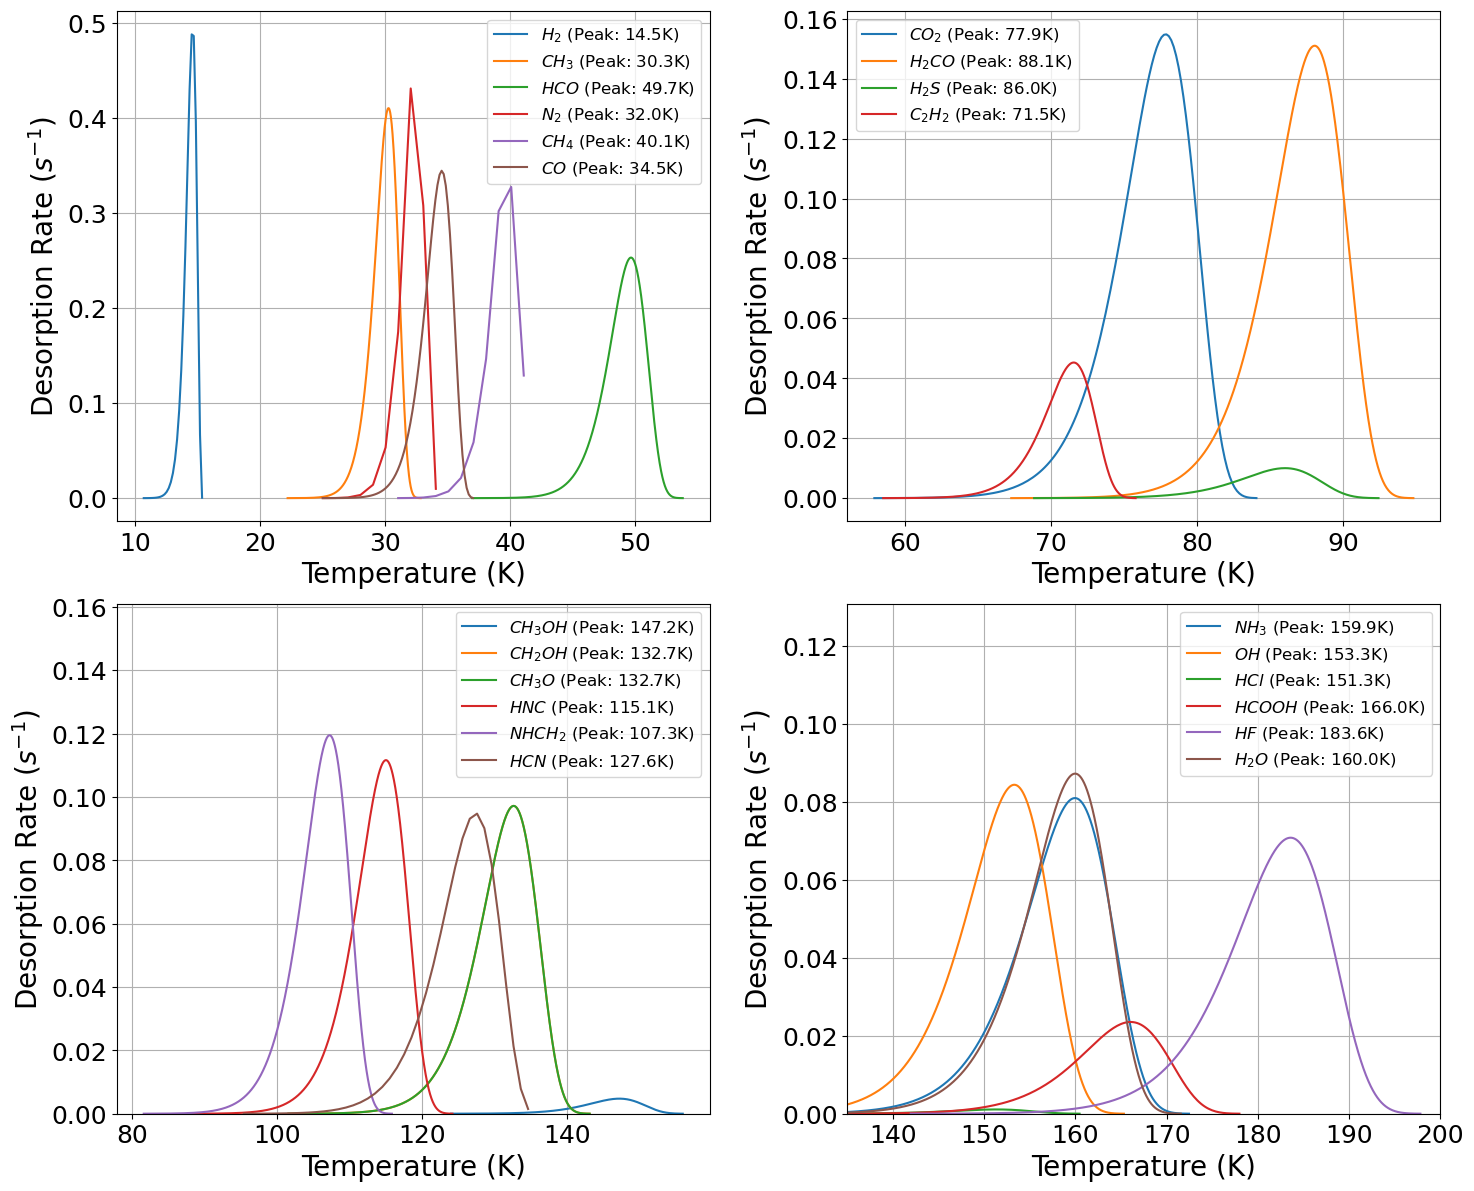

In [317]:
import numpy as np
import matplotlib.pyplot as plt

# Functions
# def temperature(t, T0, beta):
#     """ Calculate temperature at time t. """
#     return T0 + beta * t

def rate_constant(T, k0, E, R):
    """ Calculate the rate constant at temperature T. """
    return k0 * np.exp(-E / (R * T))

def integrand(T, theta, k0, E, R, beta):
    """ Calculate the rate of change of coverage at time t. """
#     T = temperature(t, T0, beta)
    k = rate_constant(T, k0, E, R)
    return -(k * theta)/beta

# Parameters for the TPD simulation
R = 8.314  # Universal gas constant in J/(mol*K)

# Dictionaries to store data for each temperature range
temp_ranges = {
    "0-50 K": [],
    "51-100 K": [],
    "101-150 K": [],
    "151-200 K": []
}

for index, row in TPD_lit_df.iterrows():
    if row['Surface'] !=r'$$CO_{2}$$' :
    
        k0 = row['pre exponent factor (s^-1)']  # Pre-exponential factor in 1/s
        E_k = row['Binding Energy (K)']  # Activation energy in K
        E = 8.3 * E_k  # Activation energy in J/mol
        T0 = row['Initial temp (K)']  # Initial temperature in K
        beta = row['heating rate (Ks^-1)']  # Heating rate in K/s
        theta0 = row['Initial coverage']  # Initial coverage
        
        # Time array
#         if row['molecule']!='HF':
        time = np.linspace(0, 20000, 10000)  # Time from 0 to ... seconds
#         else:
#             time = np.linspace(0, 13000, 10000)
        
        # Temperature array
        T_end=200
        
        temperatures = np.linspace(T0,T_end,int((T_end-T0)/beta))
        
        # Coverage array
        coverage = np.zeros_like(temperatures)
        coverage[0] = theta0

        # Numerical integration using Euler's method
        dt = time[1] - time[0]  # Time step
        dT = temperatures[1] - temperatures[0]
        
        for i in range(1, len(temperatures)):
            coverage[i] = coverage[i-1] + integrand(temperatures[i-1], coverage[i-1], k0, E, R, beta) * dT
            if coverage[i] < 0:
                coverage[i] = 0

        # Calculate desorption rate
        desorption_rate = -np.gradient(coverage, dT)

        # Find peak temperature
        max_x = temperatures[desorption_rate.argmax()]
        max_y = max(desorption_rate)
        TPD_lit_df.loc[index, 'Peak Temp (K)'] = max_x
        TPD_lit_df.loc[index, 'peak desorption rate (1/s)']=max_y
        

        # Assign to the correct temperature range
        if 0 <= max_x <= 50:
            temp_ranges["0-50 K"].append((temperatures, desorption_rate, row['molecule'], max_x))
        elif 51 <= max_x <= 100:
            temp_ranges["51-100 K"].append((temperatures, desorption_rate, row['molecule'], max_x))
        elif 101 <= max_x <= 150:
            temp_ranges["101-150 K"].append((temperatures, desorption_rate, row['molecule'], max_x))
        elif 151 <= max_x <= 200:
            temp_ranges["151-200 K"].append((temperatures, desorption_rate, row['molecule'], max_x))

# Plot results in 4 separate subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharex=False, sharey=False)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Define subplot titles based on the temperature ranges
range_labels = ["0-50 K", "51-100 K", "101-150 K", "151-200 K"]

for i, label in enumerate(range_labels):
    ax = axes[i]
    
    if temp_ranges[label]:
        # Check if there is data for this range
        for temperatures, desorption_rate, molecule, peak_temp in temp_ranges[label]:
            mask=desorption_rate>= 1e-5
            ax.plot(temperatures[mask], desorption_rate[mask], label=f'{molecule} (Peak: {peak_temp:.1f}K)')
        if label=="101-150 K":
            
            ax.set_ylim(0,max(desorption_rate)*1.7)
    ax.set_xlabel('Temperature (K)',fontsize=20)
    ax.set_ylabel('Desorption Rate ($s^{-1}$)',fontsize=20)
    ax.tick_params(axis='both',which='major',labelsize=18)
    #ax.set_title(f'TPD Curves on compact ASW surface: {label}')
    plt.xlim(135,200)
    plt.ylim(0,max(desorption_rate)*1.5)
    ax.legend(fontsize='large')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [138]:
TPD_lit_df


,ref,molecule,heating rate (Ks^-1),pre exponent factor (s^-1),Initial coverage,Initial temp (K),Binding Energy (K),Peak temp (K),Surface,Peak Temp (K),peak desorption rate (1/s)
0,"Luna et al., 2008",$CH_{4}$,0.016667,1.000000e+12,0.050000,30,800.0,30.000000,$$CO_{2}$$,NaN,NaN
1,Simon et al. 2019,$CO$,0.016667,1.000000e+12,0.100000,20,NaN,20.000000,$$CO_{2}$$,NaN,NaN
2,Noble et al. 2012,$CO_{2}$,0.166667,9.500000e+11,1.000000,18,2361.0,77.888176,$$H_{2}O$$,77.888176,0.154811
3,Simon et al. 2019,$CO$,0.016667,1.000000e+12,0.250000,20,NaN,20.000000,$$CO_{2}$$,NaN,NaN
4,Simon et al. 2019,$CO$,0.016667,1.000000e+12,0.500000,20,NaN,20.000000,$$CO_{2}$$,NaN,NaN
5,Luna et al. 2018,$CH_{3}OH$,0.066667,5.000000e+14,0.047619,10,5590.0,147.248157,$$H_{2}O$$,147.248157,0.004759
6,Noble et al. 2012,$H_{2}CO$,0.040000,1.000000e+13,1.000000,10,3007.0,88.056433,$$H_{2}O$$,88.056433,0.151014
7,"Pirronello et al. 1997, Amiaud et al. 2007",$H_{2}$,0.166667,1.000000e+13,0.550000,10,450.0,14.503951,$$H_{2}O$$,14.503951,0.487536
8,"Minissale et al. 2022, Wakelam et al. 2017",$NH_{3}$,0.016667,1.000000e+12,1.000000,10,5334.0,159.946487,$$H_{2}O$$,159.946487,0.081004
9,Sameera et al. 2017,$OH$,0.016667,1.000000e+12,1.000000,10,5106.0,153.295903,$$H_{2}O$$,153.295903,0.084420


## Get the integrated curve of the coverage

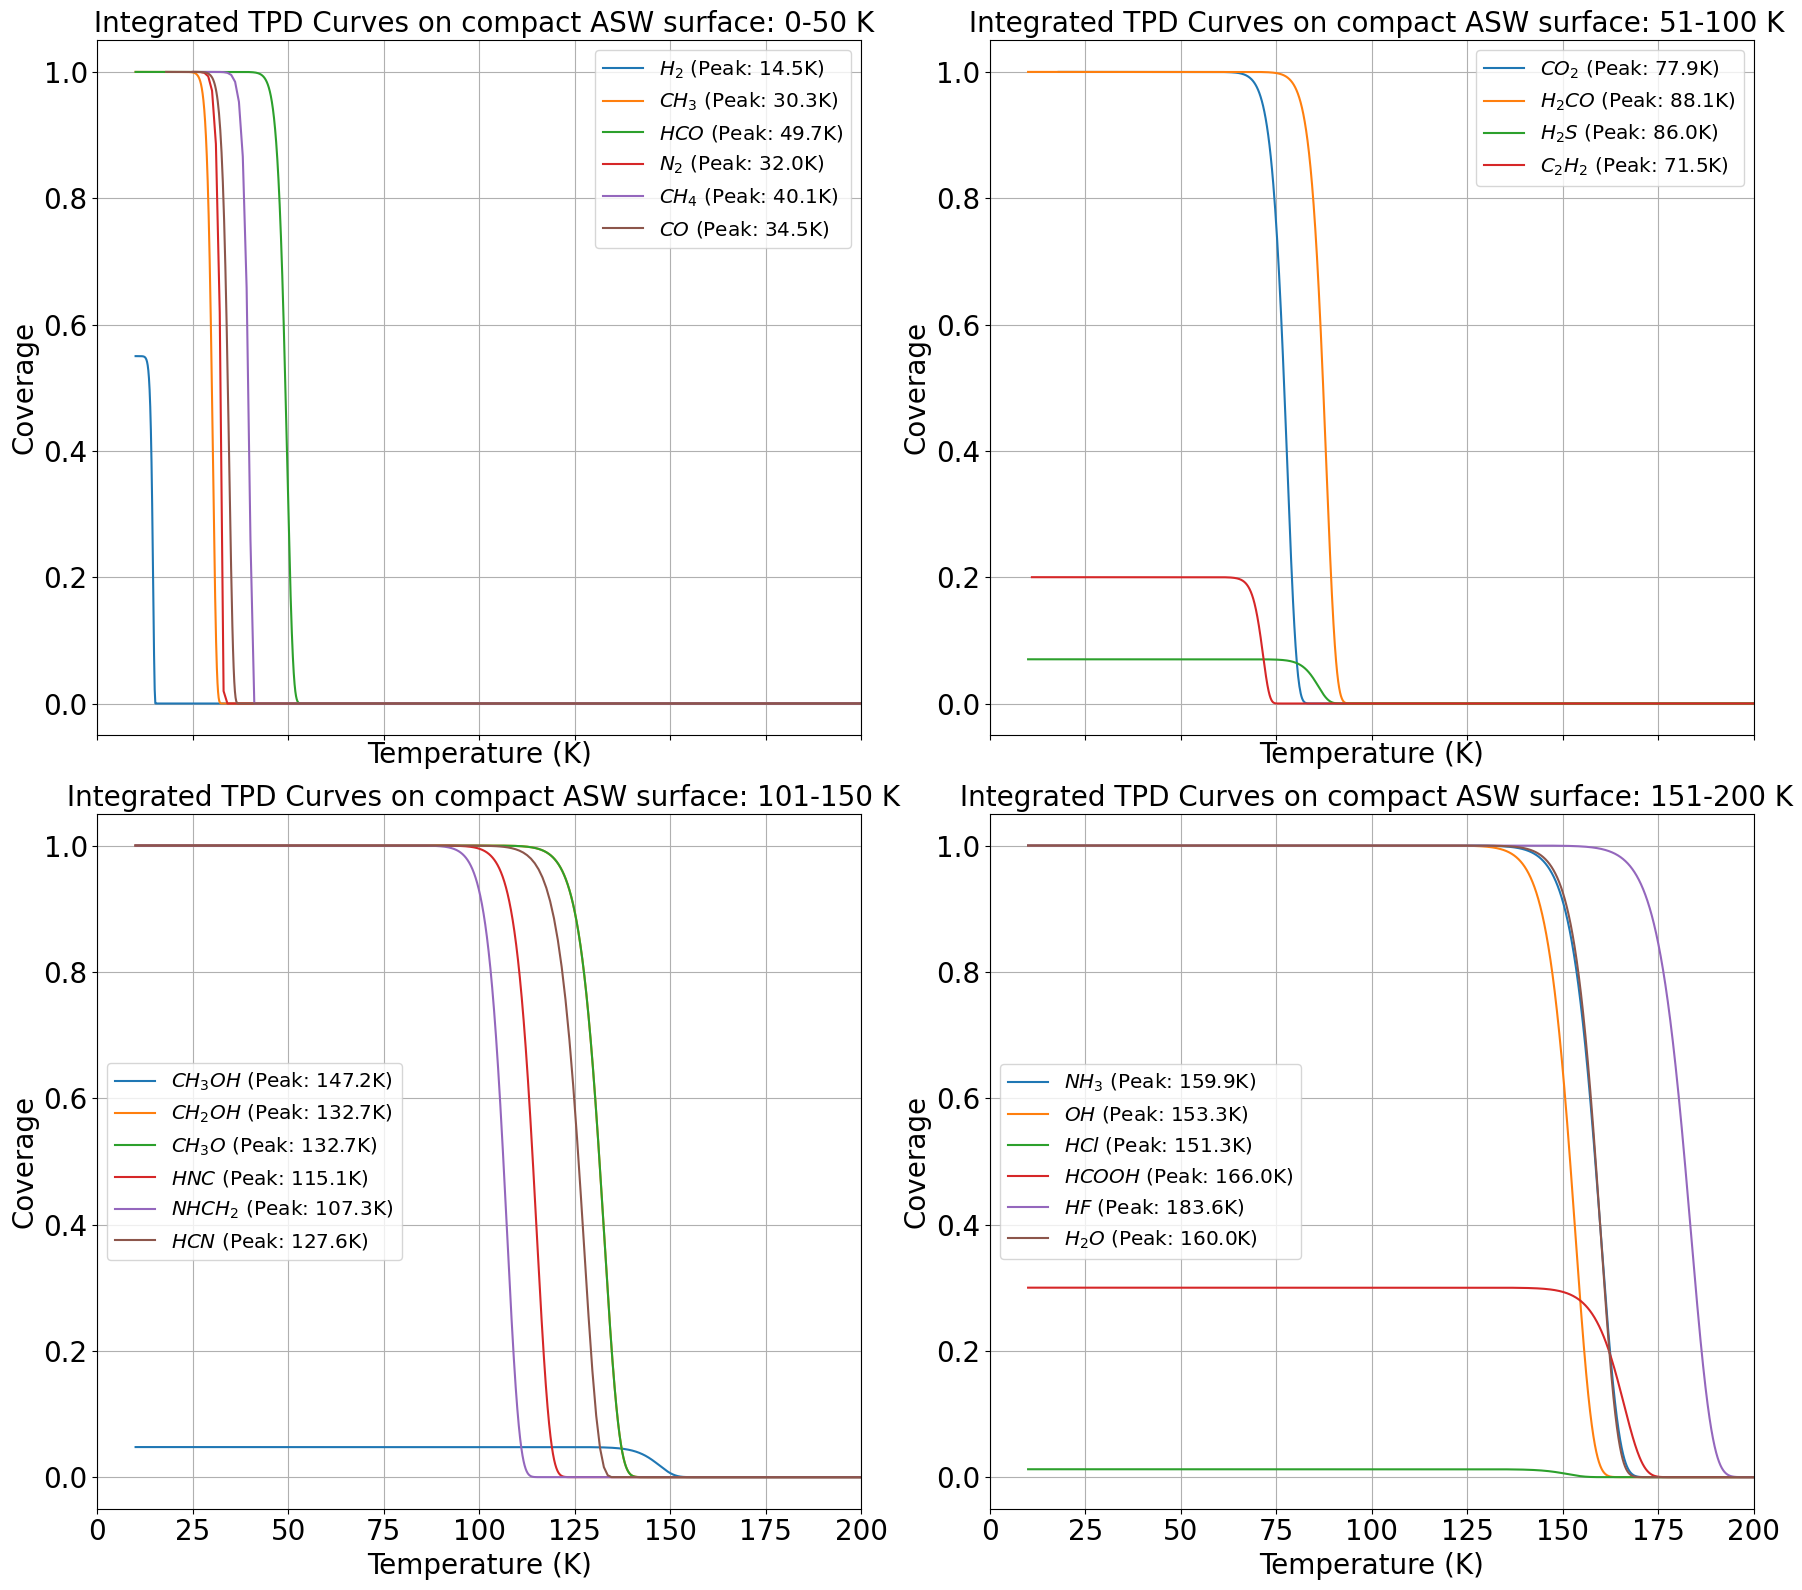

In [341]:
import numpy as np
import matplotlib.pyplot as plt

# Functions
# def temperature(t, T0, beta):
#     """ Calculate temperature at time t. """
#     return T0 + beta * t

def rate_constant(T, k0, E, R):
    """ Calculate the rate constant at temperature T. """
    return k0 * np.exp(-E / (R * T))

def integrand(T, theta, k0, E, R, beta):
    """ Calculate the rate of change of coverage at time t. """
#     T = temperature(t, T0, beta)
    k = rate_constant(T, k0, E, R)
    return -(k * theta)/beta

# Parameters for the TPD simulation
R = 8.314  # Universal gas constant in J/(mol*K)

# Dictionaries to store data for each temperature range
temp_ranges = {
    "0-50 K": [],
    "51-100 K": [],
    "101-150 K": [],
    "151-200 K": []
}

for index, row in TPD_lit_df.iterrows():
    if row['Surface'] != r'$$CO_{2}$$':
    
        k0 = row['pre exponent factor (s^-1)']  # Pre-exponential factor in 1/s
        E_k = row['Binding Energy (K)']  # Activation energy in K
        E = 8.3 * E_k  # Activation energy in J/mol
        T0 = row['Initial temp (K)']  # Initial temperature in K
        beta = row['heating rate (Ks^-1)']  # Heating rate in K/s
        theta0 = row['Initial coverage']  # Initial coverage
        
        # Time array 
        
        time = np.linspace(0, 10000, 10000)  # Time from 0 to ... seconds
        
        # Temperature array
        T_end=200
        
        temperatures = np.linspace(T0,T_end,int((T_end-T0)/beta))
        
        # Coverage array
        coverage = np.zeros_like(temperatures)
        coverage[0] = theta0

        # Numerical integration using Euler's method
        dt = time[1] - time[0]  # Time step
        dT = temperatures[1] - temperatures[0]
        
        for i in range(1, len(temperatures)):
            coverage[i] = coverage[i-1] + integrand(temperatures[i-1], coverage[i-1], k0, E, R, beta) * dT
            if coverage[i] < 0:
                coverage[i] = 0

        # Calculate desorption rate
        desorption_rate = -np.gradient(coverage, dT)

        # Find peak temperature
        max_x = temperatures[desorption_rate.argmax()]
        max_y = max(desorption_rate)
#         TPD_lit_df.loc[index, 'Peak temp (K)'] = max_x
#         TPD_lit_df.loc[index, 'peak desorption rate (1/s)']=max_y
        

        # Assign to the correct temperature range
        if 0 <= max_x <= 50:
            temp_ranges["0-50 K"].append((temperatures, coverage, row['molecule'], max_x))
        elif 51 <= max_x <= 100:
            temp_ranges["51-100 K"].append((temperatures, coverage, row['molecule'], max_x))
        elif 101 <= max_x <= 150:
            temp_ranges["101-150 K"].append((temperatures, coverage, row['molecule'], max_x))
        elif 151 <= max_x <= 200:
            temp_ranges["151-200 K"].append((temperatures, coverage, row['molecule'], max_x))

# Plot results in 4 separate subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 16), sharex=True, sharey=False)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Define subplot titles based on the temperature ranges
range_labels = ["0-50 K", "51-100 K", "101-150 K", "151-200 K"]

for i, label in enumerate(range_labels):
    ax = axes[i]
    
    if temp_ranges[label]:  # Check if there is data for this range
        for temperatures, coverage, molecule, peak_temp in temp_ranges[label]:
            ax.plot(temperatures, coverage, label=f'{molecule} (Peak: {peak_temp:.1f}K)')
    
    ax.set_xlabel('Temperature (K)',fontsize=20)
    ax.set_ylabel('Coverage',fontsize=20)
    ax.set_title(f' Integrated TPD Curves on compact ASW surface: {label}',fontsize=20)
    ax.tick_params(axis='both',which='major',labelsize=20)
    plt.xlim(0,200)
    #plt.ylim(0,0.025)
    ax.legend(fontsize='x-large')
    ax.grid(True)

plt.tight_layout()
plt.show()


## Taking H2O, changing values for the parameters one by one

### varying the surface coverage

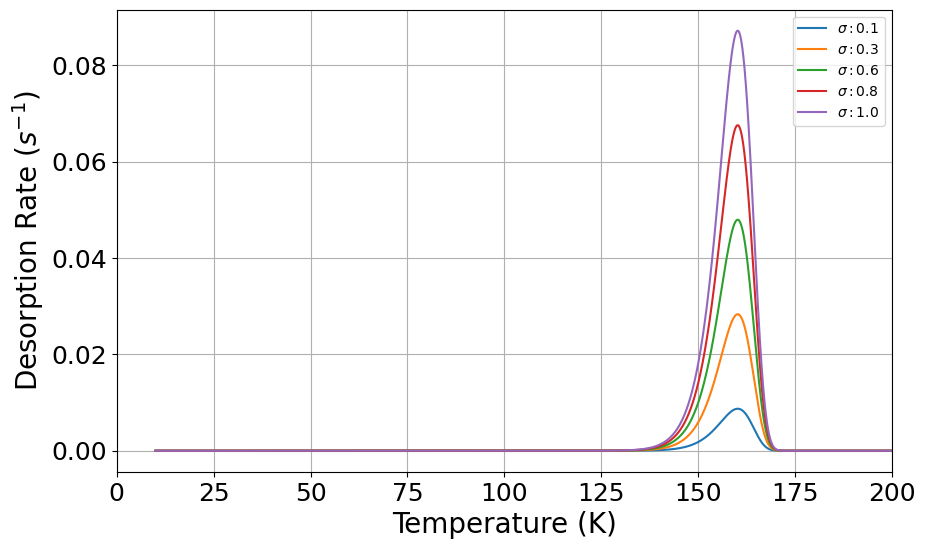

In [342]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Functions
# def temperature(t, T0, beta):
#     """ Calculate temperature at time t. """
#     return T0 + beta * t

def rate_constant(T, k0, E, R):
    """ Calculate the rate constant at temperature T. """
    return k0 * np.exp(-E / (R * T))

def integrand(T,theta, k0, E, R, beta):
    """ Calculate the rate of change of coverage at time t. """
    #T = temperature(t, T0, beta)
    k = rate_constant(T, k0, E, R)
    return -(k * theta) / beta

# Parameters for the TPD simulation
R = 8.314  # Universal gas constant in J/(mol*K)

# Lists to store handles and labels for the legend
handles = []
labels = []

for index, row in TPD_lit_df.iterrows():
    if row['molecule'] == '$H_{2}O$':
        k0 = row['pre exponent factor (s^-1)']  # Pre-exponential factor in 1/s
        E_k = row['Binding Energy (K)']  # Activation energy in K
        E = 8.314 * E_k  # Activation energy in J/mol
        T0 =row['Initial temp (K)']  # Initial temperature in K
        beta = row['heating rate (Ks^-1)']  # Heating rate in K/s
        theta0 = np.linspace(0.1, 1, 5)  # Initial coverages

        # Time array
        time = np.linspace(0, 10000, 10000)  # Time from 0 to ... seconds

        # Temperature array
        #temperatures = temperature(time, T0, beta)
        T_end=200
        temperatures=np.linspace(T0,T_end,int((T_end-T0)/beta))

        for the in theta0:
            coverage = np.zeros_like(temperatures)
            coverage[0] = the

            # Numerical integration of the Polanyi-Wigner equation using Euler's method
            dt = time[1] - time[0]  # Time step
            dT = (temperatures[1] - temperatures[0])

            for i in range(1, len(temperatures)):
                
                coverage[i] = coverage[i-1] + integrand(temperatures[i-1],coverage[i-1],
                                                        k0, E, R, beta) * dT
                if coverage[i] < 0:
                    coverage[i] = 0

            # Calculate desorption rate
            desorption_rate = -np.gradient(coverage, dT)
           

            # Plot results for each initial coverage
            line,= plt.plot(temperatures, desorption_rate, label=fr'$\sigma: {the:.1f}$')
            handles.append(line)
            labels.append(fr'$\sigma: {the:.1f}$')

plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Desorption Rate ($s^{-1}$)',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)  # Change 14 to your desired font size
#plt.title('TPD Simulation of a compact ASW surface ($H_{2}O$)')
plt.xlim(0, 200)  # Adjust this range as needed
plt.legend(handles=handles,labels=labels)
plt.grid(True)
plt.show()

### Varying Pre-exponent factor

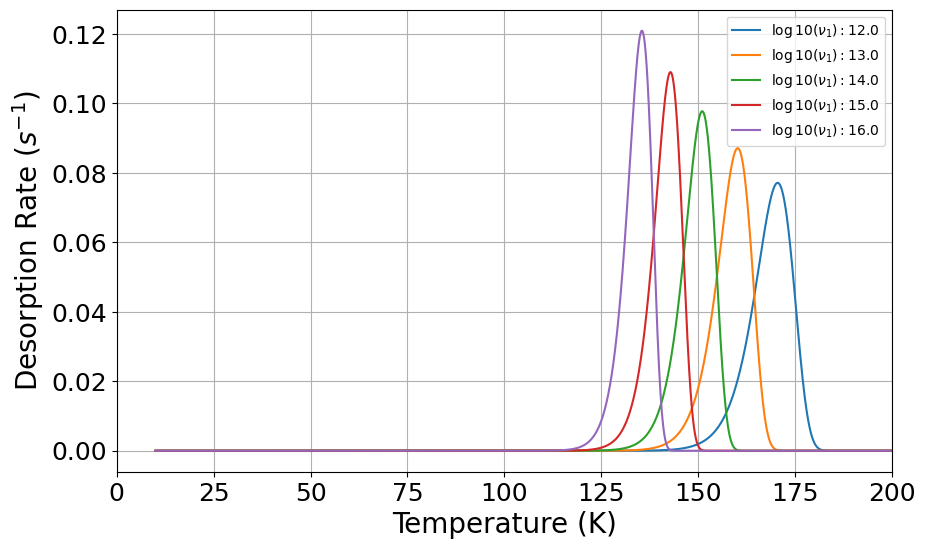

In [343]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Functions
# def temperature(t, T0, beta):
#     """ Calculate temperature at time t. """
#     return T0 + beta * t

def rate_constant(T, k0, E, R):
    """ Calculate the rate constant at temperature T. """
    return k0 * np.exp(-E / (R * T))

def integrand(T,theta, k0, E, R, beta):
    """ Calculate the rate of change of coverage at time t. """
    #T = temperature(t, T0, beta)
    k = rate_constant(T, k0, E, R)
    return -(k * theta) / beta

# Parameters for the TPD simulation
R = 8.314  # Universal gas constant in J/(mol*K)

# Lists to store handles and labels for the legend
handles = []
labels = []

for index, row in TPD_lit_df.iterrows():
    if row['molecule'] == '$H_{2}O$':
        k0 = np.logspace(12,16,5)#row['pre exponent factor (s^-1)']  # Pre-exponential factor in 1/s
        E_k = row['Binding Energy (K)']  # Activation energy in K
        E = 8.314 * E_k  # Activation energy in J/mol
        T0 =row['Initial temp (K)']  # Initial temperature in K
        beta = row['heating rate (Ks^-1)']  # Heating rate in K/s
        theta0 = row['Initial coverage']  # Initial coverages

        # Time array
        time = np.linspace(0, 10000, 10000)  # Time from 0 to ... seconds

        # Temperature array
        #temperatures = temperature(time, T0, beta)
        T_end=200
        temperatures=np.linspace(T0,T_end,int((T_end-T0)/beta))

        for k in k0:
            coverage = np.zeros_like(temperatures)
            coverage[0] = theta0

            # Numerical integration of the Polanyi-Wigner equation using Euler's method
            dt = time[1] - time[0]  # Time step
            dT = (temperatures[1] - temperatures[0])

            for i in range(1, len(temperatures)):
                
                coverage[i] = coverage[i-1] + integrand(temperatures[i-1],coverage[i-1],
                                                        k, E, R, beta) * dT
                if coverage[i] < 0:
                    coverage[i] = 0

            # Calculate desorption rate
            desorption_rate = -np.gradient(coverage, dT)
            max_x = temperatures[desorption_rate.argmax()]
            

            # Plot results for each initial coverage
            line,= plt.plot(temperatures, desorption_rate, label=fr'$\nu (s^{{-1}}) : {k}')
            handles.append(line)
            labels.append(fr'$\log10(\nu_{1}) :{np.log10(k)}$')

plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Desorption Rate ($s^{-1}$)',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
#plt.title('TPD Simulation of a compact ASW surface')
plt.xlim(0, 200)  # Adjust this range as needed
plt.legend(handles=handles,labels=labels)
plt.grid(True)
plt.show()

### Varying heating Rate

128.8466255085553
135.50660561082162
142.9699842022117
151.74603174603175


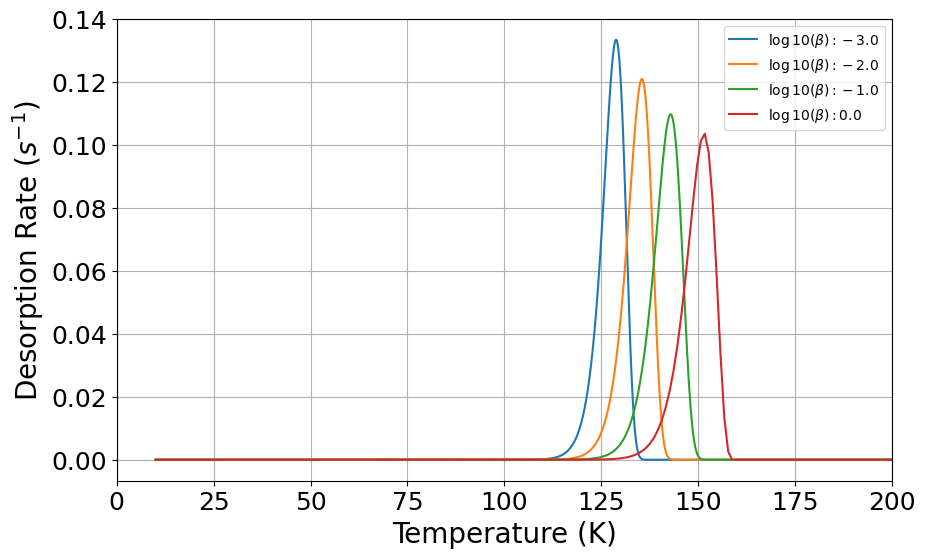

In [344]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Functions
# def temperature(t, T0, beta):
#     """ Calculate temperature at time t. """
#     return T0 + beta * t

def rate_constant(T, k0, E, R):
    """ Calculate the rate constant at temperature T. """
    return k0 * np.exp(-E / (R * T))

def integrand(T,theta, k0, E, R, beta):
    """ Calculate the rate of change of coverage at time t. """
    #T = temperature(t, T0, beta)
    k = rate_constant(T, k0, E, R)
    return -(k * theta) / beta

# Parameters for the TPD simulation
R = 8.314  # Universal gas constant in J/(mol*K)

# Lists to store handles and labels for the legend
handles = []
labels = []

for index, row in TPD_lit_df.iterrows():
    if row['molecule'] == '$H_{2}O$':
        k0 = row['pre exponent factor (s^-1)']  # Pre-exponential factor in 1/s
        E_k = row['Binding Energy (K)']  # Activation energy in K
        E = 8.314 * E_k  # Activation energy in J/mol
        T0 =row['Initial temp (K)']  # Initial temperature in K
        beta = np.array(np.logspace(-3,0,4))#row['heating rate (Ks^-1)']  # Heating rate in K/s
        
        theta0 = row['Initial coverage']  # Initial coverage

        # Time array
        time = np.linspace(0, 10000, 10000)  # Time from 0 to ... seconds

        # Temperature array
        #temperatures = temperature(time, T0, beta)
        T_end=200
        

        for b in beta:
            temperatures=np.linspace(T0,T_end,int((T_end-T0)/b))
            coverage = np.zeros_like(temperatures)
            coverage[0] = theta0

            # Numerical integration of the Polanyi-Wigner equation using Euler's method
            dt = time[1] - time[0]  # Time step
            dT = (temperatures[1] - temperatures[0])

            for i in range(1, len(temperatures)):
                
                coverage[i] = coverage[i-1] + integrand(temperatures[i-1],coverage[i-1],
                                                        k, E, R, b) * dT
                if coverage[i] < 0:
                    coverage[i] = 0

            # Calculate desorption rate
            desorption_rate = -np.gradient(coverage, dT)
            max_x = temperatures[desorption_rate.argmax()]
            print(max_x)

            # Plot results for each initial coverage
            line,= plt.plot(temperatures, desorption_rate, label=fr'$\log10(\beta): {np.log10(b)}$')
            handles.append(line)
            labels.append(fr'$\log10(\beta): {np.log10(b)}$')

plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Desorption Rate ($s^{-1}$)',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
#plt.title('TPD Simulation on compact ASW surface',fontsize=12)

plt.xlim(0, 200)  # Adjust this range as needed
plt.legend(handles=handles,labels=labels)
plt.grid(True)
plt.show()

### varying Binding Energy 



[41570. 45727. 49884. 54041. 58198.]
117.74567082478025
129.24627611979577
140.71687983578082
152.1674824990789
163.60808463603345


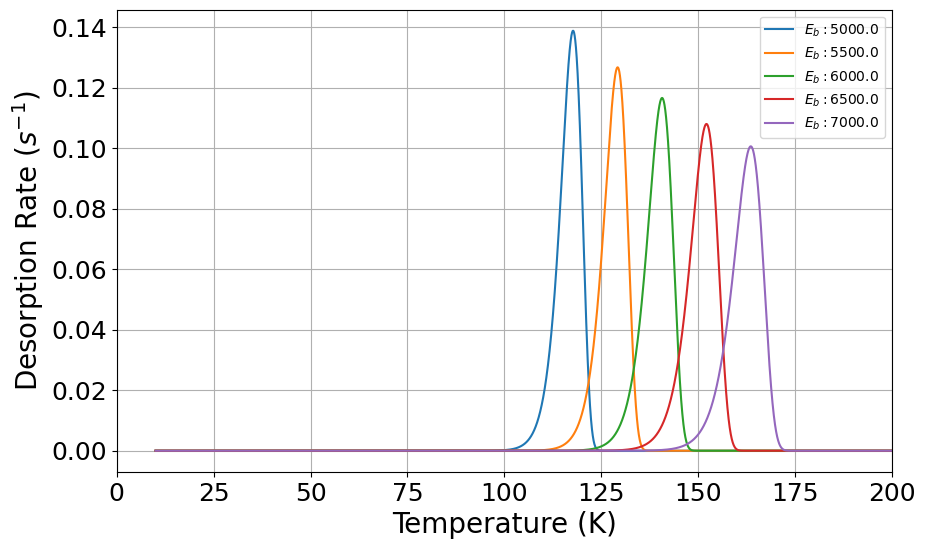

In [345]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Functions
# def temperature(t, T0, beta):
#     """ Calculate temperature at time t. """
#     return T0 + beta * t

def rate_constant(T, k0, E, R):
    """ Calculate the rate constant at temperature T. """
    return k0 * np.exp(-E / (R * T))

def integrand(T,theta, k0, E, R, beta):
    """ Calculate the rate of change of coverage at time t. """
    #T = temperature(t, T0, beta)
    k = rate_constant(T, k0, E, R)
    return -(k * theta) / beta

# Parameters for the TPD simulation
R = 8.314  # Universal gas constant in J/(mol*K)

# Lists to store handles and labels for the legend
handles = []
labels = []

for index, row in TPD_lit_df.iterrows():
    if row['molecule'] == '$H_{2}O$':
        k0 = row['pre exponent factor (s^-1)']  # Pre-exponential factor in 1/s
        E_k = np.linspace(5000,7000,5)#row['Binding Energy (K)']  # Activation energy in K
        E = 8.314 * E_k  # Activation energy in J/mol
        print(E)
        T0 =row['Initial temp (K)']  # Initial temperature in K
        beta = row['heating rate (Ks^-1)']  # Heating rate in K/s
        
        theta0 = row['Initial coverage']  # Initial coverage

        # Time array
        time = np.linspace(0, 10000, 10000)  # Time from 0 to ... seconds

        # Temperature array
#         temperatures = temperature(time, T0, beta)
        T_end=200
        temperatures = np.linspace(T0,T_end,int((T_end-T0)/beta))
        
        

        for energy in E:
            
            coverage = np.zeros_like(temperatures)
            coverage[0] = theta0

            # Numerical integration of the Polanyi-Wigner equation using Euler's method
            dt = time[1] - time[0]  # Time step
            dT = (temperatures[1] - temperatures[0])

            for i in range(1, len(temperatures)):
                
                coverage[i] = coverage[i-1] + integrand(temperatures[i-1],coverage[i-1],
                                                        k, energy, R, beta) * dT
                if coverage[i] < 0:
                    coverage[i] = 0

            # Calculate desorption rate
            desorption_rate = -np.gradient(coverage, dT)
            max_x = temperatures[desorption_rate.argmax()]
            print(max_x)

            # Plot results for each initial coverage
            line,= plt.plot(temperatures, desorption_rate, label=fr'$\E_{{b}}: {energy/8.314}$')
            handles.append(line)
            labels.append(fr'$E_{{b}}: {energy/8.314}$')

plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Desorption Rate ($s^{-1}$)',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
#plt.title('TPD Simulation on compact ASW surface')
plt.xlim(0, 200)  # Adjust this range as needed
plt.legend(handles=handles,labels=labels)
plt.grid(True)
plt.show()

## 4th Order Runge-Kutta Method

0.16666666666666666
0.06666666666666667
0.04
0.16666666666666666
0.016666666666666666
0.016666666666666666
0.016666666666666666
0.016666666666666666
0.016666666666666666
0.06666666666666667
0.06666666666666667
0.2
0.016666666666666666
0.016666666666666666
0.016666666666666666
0.016666666666666666
0.03333333333333333
0.01
1.0
1.0
1.0
0.16666666666666666


<Figure size 1000x600 with 0 Axes>

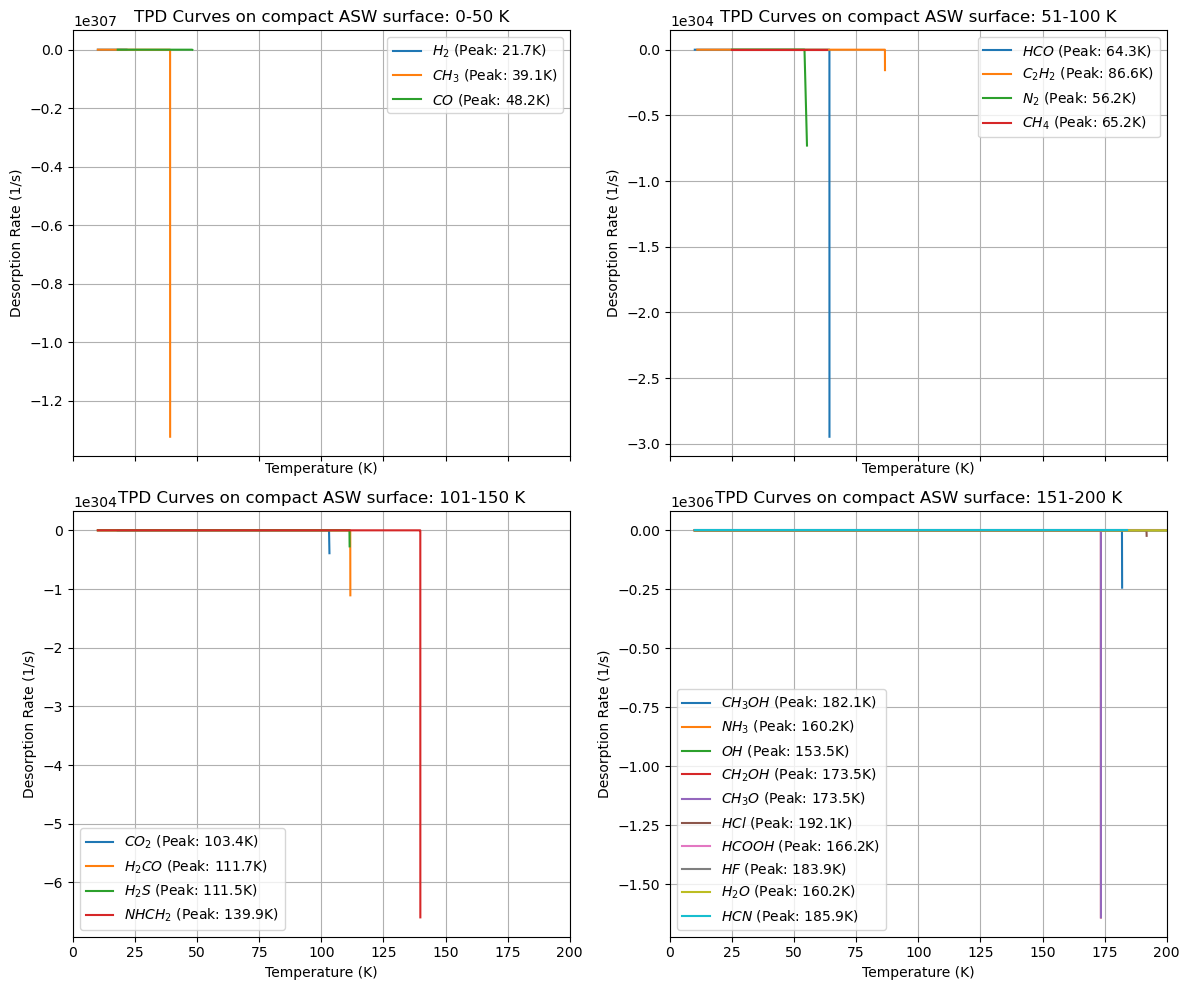

In [106]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Constants
R = 8.314  # J/(mol K)

def rate_constant(T, k0, E, R):
    """ Calculate the rate constant at temperature T. """
    return k0 * np.exp(-E / (R * T))

def integrand(theta,T, k0, E, R, beta):
    """ Calculate the rate of change of coverage at time t. """
    #T = temperature(t, T0, beta)
    k = rate_constant(T, k0, E, R)
    return -(k * theta) / beta

# Function to calculate the rate of change of theta

# Runge-Kutta 4th order method
def runge_kutta_4(theta0, T0, Tf):
    T_values = np.linspace(T0, Tf, int((Tf-T0)/beta))
    coverage = np.zeros_like(T_values)
    coverage[0] = theta0
    dT=beta
    for i in range(1, len(T_values)):
        T = T_values[i-1]
        #dT=T_values[i]-T_values[i-1]
        theta = coverage[i-1]
        
        k1 = integrand(theta, T, k0, E, R, dT)
        k2 = integrand(theta + 0.5 * k1 * dT, T + 0.5 * dT, k0, E, R, dT)
        k3 = integrand(theta + 0.5 * k2 * dT, T + 0.5 * dT, k0, E, R, dT)
        k4 = integrand(theta + k3 * dT, T + dT, k0, E, R, dT)
        
        coverage[i] = theta + (beta / 6) * (k1 + 2*k2 + 2*k3 + k4)
        if coverage[i]<0:
            coverage[i]=0
            
    print(dT)
    
    
    return T_values, coverage


# Dictionaries to store data for each temperature range
temp_ranges = {
    "0-50 K": [],
    "51-100 K": [],
    "101-150 K": [],
    "151-200 K": []
}

# Parameters for the TPD simulation

for index, row in TPD_lit_df.iterrows():
    if row['Surface'] != r'$$CO_{2}$$':
    
        k0 = row['pre exponent factor (s^-1)']  # Pre-exponential factor in 1/s
        E_k =  row['Binding Energy (K)'] # Activation energy in K
        E = 8.314*E_k  # Activation energy in J/mol
        T0 = row['Initial temp (K)'] # Initial temperature in K
        beta = row['heating rate (Ks^-1)'] # Heating rate in K/s
        theta0 = row['Initial coverage']  # Initial coverage
        T_end=200
        #temp array
        
        # Solve the ODE
        T_values, coverage = runge_kutta_4(theta0, T0, T_end)
      
        # Calculate desorption rate
        desorption_rate = -np.gradient(coverage, beta)

        max_x = T_values[desorption_rate.argmax()]
#         TPD_lit_df.loc[index, 'Peak temp (K)'] = max_x
#         TPD_lit_df.loc[index, 'peak desorption rate (1/s)']=max_y
# #         error= np.abs(max_x - row['Peak temp (K)'])
#         TPD_lit_df.loc[index, 'Error temp (K)'] = error
        

# Assign to the correct temperature range
        if 0 <= max_x <= 50:
            temp_ranges["0-50 K"].append((T_values, desorption_rate, row['molecule'], max_x))
        elif 51 <= max_x <= 100:
            temp_ranges["51-100 K"].append((T_values, desorption_rate, row['molecule'], max_x))
        elif 101 <= max_x <= 150:
            temp_ranges["101-150 K"].append((T_values, desorption_rate, row['molecule'], max_x))
        elif 151 <= max_x <= 200:
            temp_ranges["151-200 K"].append((T_values, desorption_rate, row['molecule'], max_x))

# Plot results in 4 separate subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=False)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Define subplot titles based on the temperature ranges
range_labels = ["0-50 K", "51-100 K", "101-150 K", "151-200 K"]

for i, label in enumerate(range_labels):
    ax = axes[i]
    
    if temp_ranges[label]:  # Check if there is data for this range
        for T_values, desorption_rate, molecule, peak_temp in temp_ranges[label]:
            ax.plot(T_values, desorption_rate, label=f'{molecule} (Peak: {peak_temp:.1f}K)')
    
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Desorption Rate (1/s)')
    ax.set_title(f'TPD Curves on compact ASW surface: {label}')
    plt.xlim(0,200)
    #plt.ylim(0,0.025)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

## Calculate the pre exponential factor using TST method

In [168]:
import pandas as pd

h = 6.626e-34
k_b = 1.38e-23
A=1e-19
amu = 1.67e-27
I_conversion_factor=amu*1e-20

def translation_2D(T_peak,m):
    
    Lambda = h/np.sqrt(2*np.pi*m*amu*k_b*T_peak)
    q_trans = A/Lambda**2
    return q_trans

def rotation_2D(sym_factor, T_peak, I_y,I_z):
    term_1= np.sqrt(np.pi)/(sym_factor*(h**2))
    term_2 = 8*(np.pi**2)*k_b*T_peak
    term_3 = np.sqrt(I_y*I_z*I_conversion_factor**2)
    q_rot_2D = term_1*term_2*term_3
    return q_rot_2D

def rotation_3D(sym_factor, T_peak,I_x,I_y,I_z):
    term_1= np.sqrt(np.pi)/(sym_factor*(h**3))
    term_2 = (8*(np.pi**2)*k_b*T_peak)**(3/2)
    term_3 = np.sqrt(I_x*I_y*I_z*I_conversion_factor**3)
    q_rot_3D = term_1*term_2*term_3
    return q_rot_3D


def TST(df,sym_factor, T_peak,I_x,I_y,I_z,m):
    
    term_1 = (k_b*T_peak)/h
    term_2 = translation_2D(T_peak,m)
    if df =='yes':
        term_3 = rotation_2D(sym_factor,T_peak,I_y,I_z)
    else:
        term_3= rotation_3D(sym_factor, T_peak,I_x,I_y,I_z)
    nu_TST = term_1*term_2*term_3
    return nu_TST

# def err_TST(df,err_T_peak,nu_TST,T_peak):
#     if df == 'yes':
#         err_nu= (7/2)*(err_T_peak/T_peak)*nu_TST
#     else:
#         err_nu= (6/2)*(err_T_peak/T_peak)*nu_TST
#     return err_nu

def readhead(beta,T_peak, E_b):
    term_1 = beta/T_peak
    term_2 = np.exp((E_b/T_peak)+3.64)
    nu_redhead=term_1*term_2
    return nu_redhead

# def err_redhead(err_T_peak,T_peak,nu_redhead):
#     term_1 = -((1/T_peak) + (1/T_peak**2))
#     term_2 = err_T_peak * nu_redhead
#     err_nu_redhead = term_1*term_2
#     return np.abs(err_nu_redhead)



# Changing data types from objects to floats
TPD_lit_df['Binding Energy (K)'].astype(float)
TPD_lit_df['Peak Temp (K)'].astype(float)
# Joining the TPD_lit and I_values dfs
df_I_values_resetted= df_I_values.assign(molecule=df_I_values.index).reset_index()
#df_I_values_resetted.drop(columns='index')

joined_df=pd.merge(df_I_values_resetted,TPD_lit_df,on='molecule').drop(columns='index')
joined_df['Binding Energy (K)'].astype(float)
joined_df['Peak Temp (K)'].astype(float)
joined_df.dtypes
for index, row in joined_df.iterrows():
    if row['Surface'] != r'$CO_{2}$':
        nu_TST=TST(row['2D-rotations?'],row[r'$\sigma$'],
                   row['Peak Temp (K)'],row[r'$I_{x}$'],
                   row[r'$I_{y}$'],row[r'$I_{z}$'],row['mass (amu)'])
        
        joined_df.loc[index, r'$\nu_{{TST}}$'] = nu_TST
        
#         err_nu_TST= err_TST(row['2D-rotations?'],
#                             row['Error Temp (K)'],
#                             nu_TST,
#                            row['Peak Temp (K)'])
        
#         joined_df.loc[index, r'$err\nu_{{TST}}$'] = err_nu_TST
        
        nu_redhead = readhead(row['heating rate (Ks^-1)'],
                             row['Peak Temp (K)'],
                              row['Binding Energy (K)'])
    
        joined_df.loc[index, r'$\nu_{{RH}}$'] = nu_redhead
        
#         err_nu_redhead= err_redhead(row['Error Temp (K)']
#                                     ,row['Peak Temp (K)']
#                                     ,nu_redhead)
        
#         joined_df.loc[index, r'$\Delta \nu_{{RH}}$'] = err_nu_redhead
        
        joined_df.loc[index,r'$\Lambda$'] = h/np.sqrt(2*np.pi*
                                                      row['mass (amu)']*amu*
                                                      k_b*row['Peak Temp (K)'])
        joined_df.loc[index,r'$q_{{tr}}^{{2D}}$']   = translation_2D(row['Peak Temp (K)'],row['mass (amu)'])
        if row['2D-rotations?']=='yes':
            joined_df.loc[index,r'$q_{{rot}}^{{2D}}$'] = rotation_2D(row[r'$\sigma$'],row['Peak Temp (K)'],
                        row[r'$I_{y}$'],row[r'$I_{z}$'])
        else:
            joined_df.loc[index,r'$q_{{rot}}^{{3D}}$'] = rotation_3D(row[r'$\sigma$'],row['Peak Temp (K)'],
                        row[r'$I_{x}$'],row[r'$I_{y}$'],
                        row[r'$I_{z}$'])
        
joined_df

,$I_{x}$,$I_{y}$,$I_{z}$,mass (amu),$\sigma$,2D-rotations?,molecule,ref,heating rate (Ks^-1),pre exponent factor (s^-1),...,Peak temp (K),Surface,Peak Temp (K),peak desorption rate (1/s),$\nu_{{TST}}$,$\nu_{{RH}}$,$\Lambda$,$q_{{tr}}^{{2D}}$,$q_{{rot}}^{{2D}}$,$q_{{rot}}^{{3D}}$
0,1.110223e-16,8.516113,8.516113,28.010,1,yes,$CO$,Simon et al. 2019,0.016667,1.000000e+12,...,20.000000,$$CO_{2}$$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.110223e-16,8.516113,8.516113,28.010,1,yes,$CO$,Simon et al. 2019,0.016667,1.000000e+12,...,20.000000,$$CO_{2}$$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.110223e-16,8.516113,8.516113,28.010,1,yes,$CO$,Simon et al. 2019,0.016667,1.000000e+12,...,20.000000,$$CO_{2}$$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.110223e-16,8.516113,8.516113,28.010,1,yes,$CO$,Noble et al. 2011,0.166667,7.100000e+11,...,34.515124,$$H_{2}O$$,34.515124,0.344166,4.949261e+14,9.133680e+11,5.600186e-11,31.885638,21.592762,NaN
4,3.868064e+00,19.869103,20.582013,32.042,1,no,$CH_{3}OH$,Luna et al. 2018,0.066667,5.000000e+14,...,147.248157,$$H_{2}O$$,147.248157,0.004759,5.071925e+17,5.294999e+14,2.535006e-11,155.611628,NaN,1062.804181
5,2.878503e+00,27.520808,30.399312,30.026,1,no,$H_{2}CO$,Noble et al. 2012,0.040000,1.000000e+13,...,88.056433,$$H_{2}O$$,88.056433,0.151014,9.698530e+16,1.171278e+13,3.386370e-11,87.202941,NaN,606.437495
6,-2.168404e-19,0.275554,0.275554,2.016,2,yes,$H_{2}$,"Pirronello et al. 1997, Amiaud et al. 2007",0.166667,1.000000e+13,...,14.503951,$$H_{2}O$$,14.503951,0.487536,4.276448e+10,1.305051e+13,3.220144e-10,0.964383,0.146798,NaN
7,1.656298e+00,1.656303,2.647631,17.031,3,no,$NH_{3}$,"Minissale et al. 2022, Wakelam et al. 2017",0.016667,1.000000e+12,...,159.946487,$$H_{2}O$$,159.946487,0.081004,8.133866e+15,1.207375e+12,3.336232e-11,89.843656,NaN,27.177359
8,2.145365e-33,0.883160,0.883160,17.007,1,yes,$OH$,Sameera et al. 2017,0.016667,1.000000e+12,...,153.295903,$$H_{2}O$$,153.295903,0.084420,2.730339e+15,1.209727e+12,3.410237e-11,85.986609,9.945521,NaN
9,3.147940e+00,3.147946,3.147955,16.043,12,no,$CH_{4}$,"Luna et al., 2008",0.016667,1.000000e+12,...,30.000000,$$CO_{2}$$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Scatter Plot of the pre-exponent factors on ASW

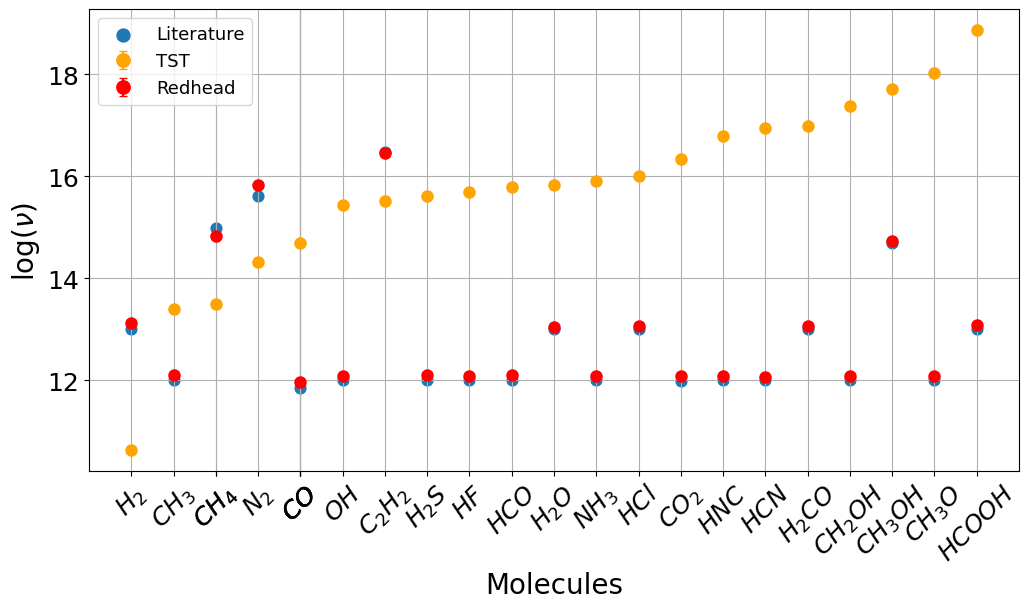

In [348]:
plt.figure(figsize=(12,6))
a=np.array([row['molecule'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])
b= np.array([row[r'$\nu_{{TST}}$'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])
# c=np.array([row[r'$err\nu_{{TST}}$'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])
d=np.array([row['pre exponent factor (s^-1)'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])
e=np.array([row[r'$\nu_{{RH}}$'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])
# f=np.array([row[r'$\Delta \nu_{{RH}}$'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$']) 

indices=np.argsort(b)
sorted_values = b[indices]
sorted_molecules=a[indices]
# sorted_errors = c[indices]
sorted_values_normal = d[indices]
sorted_values_RH = e[indices]
# sorted_errors_RH = f[indices]


#plt.scatter(sorted_molecules,sorted_values,label='TST')
plt.errorbar(sorted_molecules, np.log10(sorted_values),
             yerr=0, fmt='o',color='orange', label='TST', capsize=3,markersize=8)

plt.errorbar(sorted_molecules, np.log10(sorted_values_RH),
             yerr=0, fmt='o',color='red', label='Redhead', capsize=3,markersize=8)

plt.scatter(sorted_molecules,np.log10(sorted_values_normal),label = 'Literature',s=60)
#plt.yscale('log')
plt.ylabel(r'$\log(\nu)$',fontsize=20)
plt.xlabel('Molecules',fontsize=20)
plt.xticks(joined_df['molecule'], rotation=45,size=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(True)
plt.legend(title_fontsize=14, fontsize=13, markerscale=1.2)
plt.show()


## Bisection method of finding the Sublimation radius

In [170]:
import numpy as np

h = 6.64e-34
k_b = 1.38e-23
A = 1e-19
AU = 1.5e11

def bisection_method(f, a, b, nu_TST, E_b, tol=1e-6, max_iter=10000, expansion_factor=1.05):
    """
    Find the root of f(x) using the Bisection Method.
    
    Parameters:
    f : function
        The function whose root is to be found.
    a, b : float
        The interval [a, b] where the root is located.
    nu_TST, E_b : float
        Additional parameters for the function f.
    tol : float, optional
        The tolerance for convergence (default is 1e-10).
    max_iter : int, optional
        The maximum number of iterations (default is 10000).
    expansion_factor : float, optional
        The factor by which to expand the interval if no sign change is detected (default is 1.5).
    
    Returns:
    root : float
        The approximate root of the function.
    """
    # Adjust the interval if no sign change is detected
    adjustment_count = 0
    while f(a, nu_TST, E_b) * f(b, nu_TST, E_b) >= 0 and adjustment_count < max_iter:
        a -= expansion_factor * (b - a)
        b += expansion_factor * (b - a)
        adjustment_count += 1
        print(f"Adjusting interval to [{a}, {b}]")

    if adjustment_count == max_iter:
        raise ValueError("Failed to find a valid interval with a sign change.")

    iteration = 0
    while (b - a) / 2 > tol and iteration < max_iter:
        c = (a + b) / 2  # Midpoint
        if f(c, nu_TST, E_b) == 0:
            error=(b-a)/2
            return c,error  # Found exact root
        elif f(a, nu_TST, E_b) * f(c, nu_TST, E_b) < 0:
            b = c  # Root is in the left half
        else:
            a = c  # Root is in the right half
        iteration += 1
        #print(f(c, nu_TST, E_b))
    root = (a+b)/2
    error=(b-a)/2
       
    
    return root,error # Return the approximate root, error

# Example function (random polynomial equation)
def transcendental_radius_equation(R, nu_TST, E_b):
    T_0 = 200 
    R_0 = 1.5e11  # 1 AU
    mu = 2.34  # mean molecular mass
    m_p = 1.67e-27  # mass of proton 
    alpha = 1e-2  # alpha viscosity
    G = 6.67e-11  # Gravitational Constant
    M_star = 2e30

    phi1 = k_b * T_0 * np.sqrt(R_0)
    phi2 = ((mu * m_p) / (alpha * k_b * T_0)) * nu_TST * np.sqrt((G * M_star) / R_0)
    final = phi1 * np.log(phi2 * R) - E_b * np.sqrt(R)
    return final  

for index, row in joined_df.iterrows():
    if row['Surface'] != r'$$CO_{2}$$':
        # Interval where the root lies (must bracket a root)
        a, b = 1 * AU, 1e5 * AU
        nu_TST = row[r'$\nu_{{TST}}$']
        nu_redhead = row[r'$\nu_{{RH}}$']
        E_b = (row['Binding Energy (K)']*8.314)/6.02e23 # from K--> J/mol --> J
               
               

        # Finding the root using Bisection Method
        try:
            root,error = bisection_method(transcendental_radius_equation, a, b, nu_TST, E_b)
            root_2,error_2 = bisection_method(transcendental_radius_equation, a, b, nu_redhead, E_b)
            joined_df.loc[index,r'$R_{s} (AU)$'] = root/AU
#           joined_df.loc[index,r'$\Delta R_{s} (AU)$'] = error/AU
            joined_df.loc[index,r'$R_{s,RH} (AU)$'] = root_2/AU
            print(f"Approximate root for {row['molecule']}: {root / AU:.6f}, {root_2 / AU:.6f}")
            
        except ValueError as e:
            print(f"Error finding root for {row['molecule']}: {e}")

Approximate root for $CO$: 171.687792, 139.598321
Approximate root for $CH_{3}OH$: 6.221640, 5.023222
Approximate root for $H_{2}CO$: 21.239067, 15.918847
Approximate root for $H_{2}$: 667.048021, 809.627537
Approximate root for $NH_{3}$: 6.042228, 4.480025
Approximate root for $OH$: 6.387271, 4.905093
Approximate root for $CH_{4}$: 83.446637, 92.122697
Approximate root for $CH_{2}OH$: 9.963496, 6.678600
Approximate root for $CH_{3}O$: 10.406728, 6.678600
Approximate root for $CH_{3}$: 173.081986, 156.418438
Approximate root for $H_{2}S$: 24.085393, 18.397627
Approximate root for $HCl$: 6.482601, 5.181829
Approximate root for $HCOOH$: 6.923816, 4.548730
Approximate root for $HCO$: 71.707116, 54.348290
Approximate root for $HF$: 4.439373, 3.337958
Approximate root for $HNC$: 12.938864, 9.050523
Approximate root for $C_{2}H_{2}$: 19.262574, 20.579462
Approximate root for $H_{2}O$: 5.103206, 4.120554
Approximate root for $N_{2}$: 116.837579, 130.132047
Approximate root for $HCN$: 13.81814

## Plot the sublimation radius against the molecule for ASW

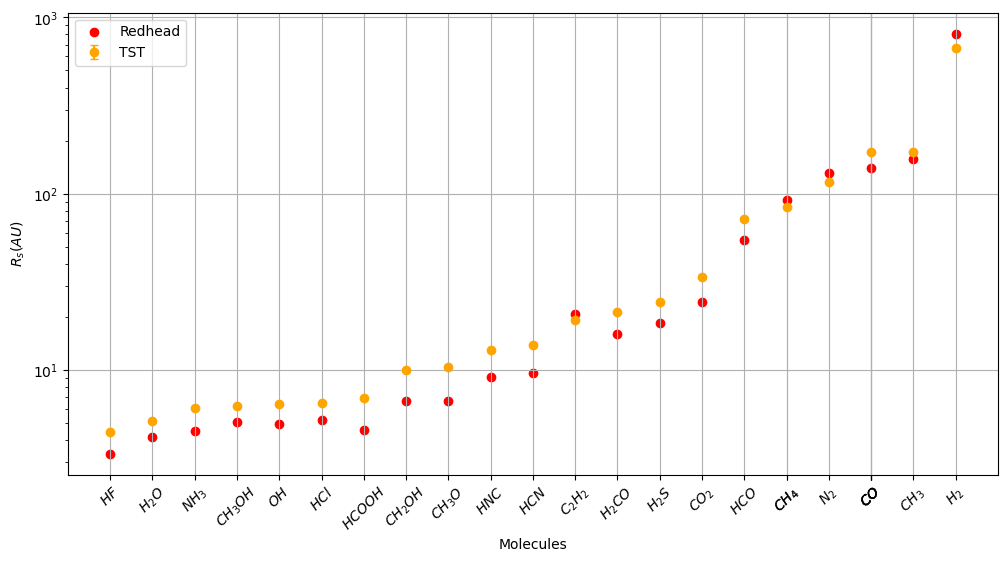

In [171]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12,6))
molecules=np.array([row['molecule'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])
sublimation_radii= np.array([row[r'$R_{s} (AU)$'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])
# radii_errors = np.array([row[r'$\Delta R_{s} (AU)$'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])
sublimation_radii_RH=np.array([row[r'$R_{s,RH} (AU)$'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])


indices=np.argsort(sublimation_radii)

sorted_sublimation_radii = sublimation_radii[indices]
sorted_molecules=molecules[indices]
# sorted_radii_errors = radii_errors[indices]
sorted_radii_RH = sublimation_radii_RH[indices]


#plt.scatter(sorted_molecules,sorted_values,label='TST')
plt.errorbar(sorted_molecules, sorted_sublimation_radii,
             yerr=0, fmt='o',color='orange', label='TST', capsize=3)

plt.scatter(sorted_molecules,sorted_radii_RH,color='red',label = 'Redhead')
plt.yscale('log')
plt.ylabel(r'$R_{s} (AU)$')
plt.xlabel('Molecules')
plt.xticks(joined_df['molecule'], rotation=45) 
plt.grid(True)
plt.legend()
plt.show()


## Get the pre exponential factor (TST) as a function of the mass for ASW

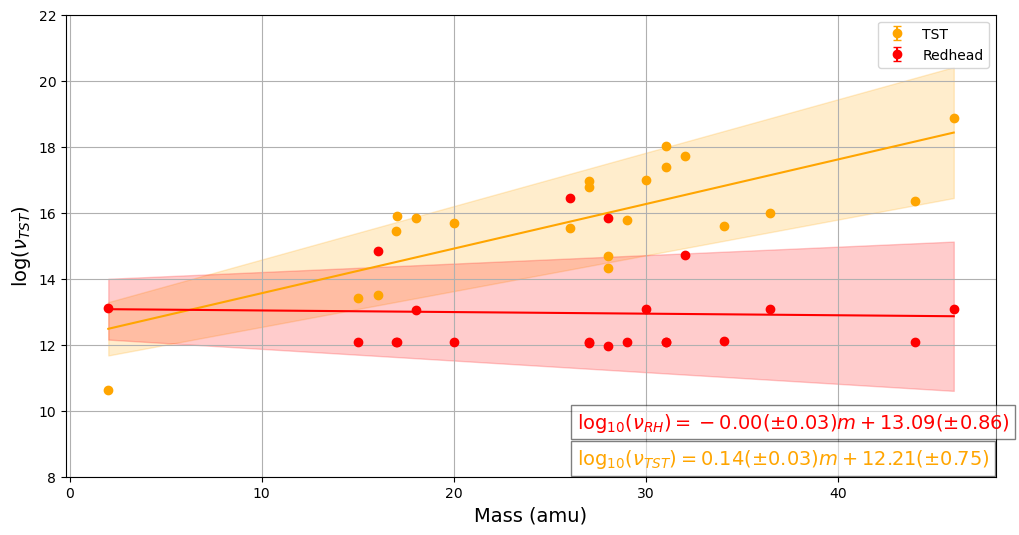

In [172]:
plt.figure(figsize=(12,6))
a=np.array([row['molecule'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])
b= np.array([row['mass (amu)'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])
c=np.array([row[r'$\nu_{{TST}}$']for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])
# d=np.array([row[r'$err\nu_{{TST}}$'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])
e = np.array([row[r'$\nu_{{RH}}$'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])
# f = np.array([row[r'$\Delta \nu_{{RH}}$'] for index,row in joined_df.iterrows() if row['Surface'] !=r'$$CO_{2}$$'])

indices=np.argsort(b)
sorted_masses = b[indices]
sorted_molecules=a[indices]
sorted_values = c[indices]
# sorted_errors = d[indices]
sorted_values_RH = e[indices]
# sorted_errors_RH = f[indices]

def linear_equation(x,m,c):
    return m*x+c

popt, pcov = curve_fit(linear_equation, 
                       (sorted_masses),
                           np.log10(sorted_values)
                                           ,
                       p0=(10,0.1))

m_fit, c_fit = popt
m_err, c_err = np.sqrt(np.diag(pcov))

lin_fit = linear_equation(sorted_masses, m_fit, c_fit)
lin_fit_upper = linear_equation(sorted_masses, m_fit + m_err, 
                                c_fit + c_err)
lin_fit_lower = linear_equation(sorted_masses, m_fit - m_err,
                                c_fit - c_err)

#Line of best fit for Redhead 

popt_RH, pcov_RH = curve_fit(linear_equation,(sorted_masses),
                           
                                           np.log10(sorted_values_RH),
                       p0=(10,0.1))

m_fit_RH, c_fit_RH = popt_RH
m_err_RH, c_err_RH = np.sqrt(np.diag(pcov_RH))

lin_fit_RH = linear_equation(sorted_masses, m_fit_RH, c_fit_RH)
lin_fit_upper_RH = linear_equation(sorted_masses, m_fit_RH + m_err_RH, 
                                c_fit_RH + c_err_RH)
lin_fit_lower_RH = linear_equation(sorted_masses, m_fit_RH - m_err_RH,
                                c_fit_RH - c_err_RH)




plt.errorbar(sorted_masses, np.log10(sorted_values),
             yerr=0, fmt='o',color='orange', label='TST', capsize=3)

plt.errorbar(sorted_masses, np.log10(sorted_values_RH),
             yerr=0, fmt='o',color='red', label='Redhead', capsize=3)


plt.plot(sorted_masses,lin_fit,color='orange')
plt.fill_between(sorted_masses, lin_fit_lower, lin_fit_upper, color='orange', 
                 alpha=0.2)

plt.plot(sorted_masses,lin_fit_RH,color='red')
plt.fill_between(sorted_masses, lin_fit_lower_RH, lin_fit_upper_RH, color='red', 
                 alpha=0.2)

#plt.yscale('log')
equation  = fr'$\log_{{10}}(\nu_{{TST}}) = {m_fit:.2f}(\pm {m_err:.2f}) m + {c_fit:.2f} (\pm {c_err:.2f})$'
equation_RH  = fr'$\log_{{10}}(\nu_{{RH}}) = {m_fit_RH:.2f}(\pm {m_err_RH:.2f}) m + {c_fit_RH:.2f} (\pm {c_err_RH:.2f})$'


plt.xlabel('Mass (amu)',fontsize=14)
#plt.xticks(joined_df['molecule'], rotation=45) 
plt.grid(True)
plt.legend()

plt.text(26.4, 8.2, equation,fontsize=14, verticalalignment='bottom',
         horizontalalignment='left',bbox=dict(facecolor='white', alpha=0.5),color='orange')

plt.text(26.4, 9.3, equation_RH,fontsize=14, verticalalignment='bottom',
         horizontalalignment='left',bbox=dict(facecolor='white', alpha=0.5),color='red')


plt.ylim(8,22)
plt.ylabel(r'$\log(\nu_{TST})$',fontsize=14)
plt.show()


In [31]:
joined_df

,$I_{x}$,$I_{y}$,$I_{z}$,mass (amu),$\sigma$,2D-rotations?,molecule,ref,heating rate (Ks^-1),pre exponent factor (s^-1),...,Surface,peak desorption rate (1/s),$\nu_{{TST}}$,$\nu_{{RH}}$,$\Lambda$,$q_{{tr}}^{{2D}}$,$q_{{rot}}^{{2D}}$,$q_{{rot}}^{{3D}}$,$R_{s} (AU)$,"$R_{s,RH} (AU)$"
0,1.110223e-16,8.516113,8.516113,28.010,1,yes,CO,Simon et al. 2019,0.016667,1.000000e+12,...,$$CO_{2}$$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.110223e-16,8.516113,8.516113,28.010,1,yes,CO,Simon et al. 2019,0.016667,1.000000e+12,...,$$CO_{2}$$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.110223e-16,8.516113,8.516113,28.010,1,yes,CO,Simon et al. 2019,0.016667,1.000000e+12,...,$$CO_{2}$$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.110223e-16,8.516113,8.516113,28.010,1,yes,CO,Noble et al. 2011,0.166667,7.100000e+11,...,$$H_{2}O$$,0.344166,4.949261e+14,9.133680e+11,5.600186e-11,31.885638,21.592762,NaN,171.687792,139.598321
4,3.868064e+00,19.869103,20.582013,32.042,1,no,CH3OH,Luna et al. 2018,0.066667,5.000000e+14,...,$$H_{2}O$$,0.004759,5.071925e+17,5.294999e+14,2.535006e-11,155.611628,NaN,1062.804181,6.221640,5.023222
5,2.878503e+00,27.520808,30.399312,30.026,1,no,H2CO,Noble et al. 2012,0.040000,1.000000e+13,...,$$H_{2}O$$,0.151014,9.698530e+16,1.171278e+13,3.386370e-11,87.202941,NaN,606.437495,21.239067,15.918847
6,-2.168404e-19,0.275554,0.275554,2.016,2,yes,H2,"Pirronello et al. 1997, Amiaud et al. 2007",0.166667,1.000000e+13,...,$$H_{2}O$$,0.487536,4.276448e+10,1.305051e+13,3.220144e-10,0.964383,0.146798,NaN,667.048021,809.627537
7,1.656298e+00,1.656303,2.647631,17.031,3,no,NH3,"Minissale et al. 2022, Wakelam et al. 2017",0.016667,1.000000e+12,...,$$H_{2}O$$,0.081004,8.133866e+15,1.207375e+12,3.336232e-11,89.843656,NaN,27.177359,6.042228,4.480025
8,2.145365e-33,0.883160,0.883160,17.007,1,yes,OH,Sameera et al. 2017,0.016667,1.000000e+12,...,$$H_{2}O$$,0.084420,2.730339e+15,1.209727e+12,3.410237e-11,85.986609,9.945521,NaN,6.387271,4.905093
9,3.147940e+00,3.147946,3.147955,16.043,12,no,CH4,"Luna et al., 2008",0.016667,1.000000e+12,...,$$CO_{2}$$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Get the sublimation radius as a function of the mass

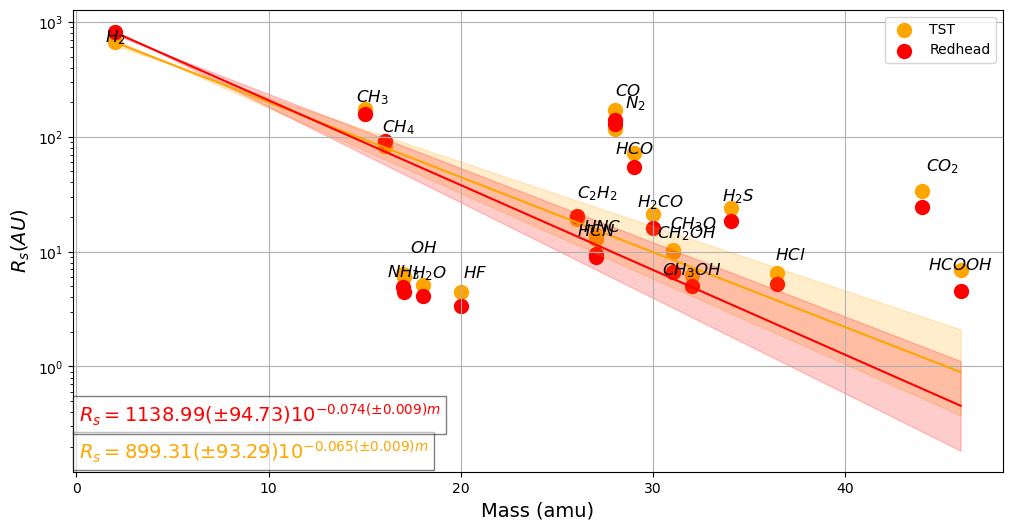

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.figure(figsize=(12, 6))

# Assuming joined_df is already defined and contains the necessary data
a = np.array([row['molecule'] for index, row in joined_df.iterrows() if row['Surface'] != r'$$CO_{2}$$'])
b = np.array([row['mass (amu)'] for index, row in joined_df.iterrows() if row['Surface'] != r'$$CO_{2}$$'])
c = np.array([row[r'$R_{s} (AU)$'] for index, row in joined_df.iterrows() if row['Surface'] != r'$$CO_{2}$$'])
d = np.array([row[r'$R_{s,RH} (AU)$'] for index, row in joined_df.iterrows() if row['Surface'] != r'$$CO_{2}$$'])

indices = np.argsort(b)
sorted_masses = b[indices]
sorted_molecules = a[indices]
sorted_radii = c[indices]
sorted_radii_RH = d[indices]

def exponential_decay(x, a, b):
    return a * 10**(-b * x)

popt_1, pcov_1 = curve_fit(exponential_decay, sorted_masses, sorted_radii, p0=(1000, -0.1), maxfev=10000)
a_fit, b_fit = popt_1
a_err, b_err = np.sqrt(np.diag(pcov_1))
exp_fit = exponential_decay(sorted_masses, a_fit, b_fit)

# Calculate the confidence interval
exp_fit_upper = exponential_decay(sorted_masses, a_fit + a_err, b_fit + b_err)
exp_fit_lower = exponential_decay(sorted_masses, a_fit - a_err, b_fit - b_err)

popt_RH, pcov_RH = curve_fit(exponential_decay, sorted_masses, sorted_radii_RH, p0=(1000, -0.1), maxfev=10000)
a_fit_RH, b_fit_RH = popt_RH
a_err_RH, b_err_RH = np.sqrt(np.diag(pcov_RH))
exp_fit_RH = exponential_decay(sorted_masses, a_fit_RH, b_fit_RH)

# Calculate the confidence interval
exp_fit_upper_RH = exponential_decay(sorted_masses, a_fit_RH + a_err_RH, b_fit_RH + b_err_RH)
exp_fit_lower_RH = exponential_decay(sorted_masses, a_fit_RH - a_err_RH, b_fit_RH - b_err_RH)

plt.scatter(sorted_masses, sorted_radii, color='orange', label='TST', s=100)
plt.scatter(sorted_masses, sorted_radii_RH, color='red', label='Redhead', s=100)

plt.plot(sorted_masses, exp_fit, color='orange')
plt.fill_between(sorted_masses, exp_fit_lower, exp_fit_upper, color='orange', alpha=0.2)

plt.plot(sorted_masses, exp_fit_RH, color='red')
plt.fill_between(sorted_masses, exp_fit_lower_RH, exp_fit_upper_RH, color='red', alpha=0.2)

plt.yscale('log')
equation = fr'$R_{{s}} = {a_fit:.2f}(\pm {a_err:.2f}) 10^{{-{b_fit:.3f}(\pm {b_err:.3f}) m}}$'
equation_RH = fr'$R_{{s}} = {a_fit_RH:.2f}(\pm {a_err_RH:.2f}) 10^{{-{b_fit_RH:.3f}(\pm {b_err_RH:.3f}) m}}$'

plt.xlabel('Mass (amu)', fontsize=14)
plt.grid(True)
plt.legend()

plt.text(0.12, 0.14, equation, fontsize=14, verticalalignment='bottom',
         horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5), color='orange')

plt.text(0.12, 0.29, equation_RH, fontsize=14, verticalalignment='bottom',
         horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5), color='red')

plt.ylabel(r'$R_{s} (AU)$', fontsize=14)

# Annotate each point with an offset to avoid overlap
for i in range(len(sorted_masses)):
    # Calculate an offset based on the index to avoid overlap
    offset_y = 5 * (i % 4)
    offset_x = 5 * (i % 4)
        # Change the multiplier to adjust spacing
    plt.annotate(sorted_molecules[i], (sorted_masses[i], sorted_radii[i]), 
                 textcoords="offset points", 
                 xytext=(offset_x, offset_y),  # Vertical offset
                 ha='center', fontsize=12, color='black')

plt.show()